In [1]:
%load_ext autoreload
%autoreload 2

In [12]:
import lvmnebular
import numpy as np
import matplotlib.pyplot as plt
import os

In [63]:
u=lvmnebular.simulation()

u.loadsim('Bubble_v2_1e-8',900)           #native simulation
#u.loadsim('Bubble_v2_5e-14', 900, vorbin=True) #voronoi simulation
#u.loadsim('Bubble_v2_5e-14', 900, snbin=True)  #snbin simulation

Loading simulation: /home/amrita/LVM/lvmnebular/Bubble_v2_1e-8

Loading simfile: /home/amrita/LVM/lvmnebular/Bubble_v2_1e-8/outputs/Bubble_v2_1e-8_linear_full_900_flux.fits
no.of bins: 169


In [65]:
#native simulation
u.fitlines(sys_vel=20, lines0= np.array([9532, 9069, 7319, 7320, 7330, 7331, 6731, 6716, 6584, 6563, 6548, 6312, 5755, 5007, 4959, 4861, 4363, 4069, 4076, 3970, 3729, 3726]), radbin=False, vorbin=False, rbinmax=260, drbin=15, loadfile=True, plot=False) #native sim

#u.fitlines(sys_vel=20, lines0= np.array([7319, 7320, 7330, 7331, 6731, 6716,  6312, 4069, 4076, 3729, 3726]), radbin=False, vorbin=False, rbinmax=260, drbin=15, loadfile=False, plot=True) #native sim

#voronoibin sim
#u.fitlines(sys_vel=20, lines0= np.array([9069, 7319, 7320, 7330, 7331, 6731, 6716, 6584, 6563, 6548, 6312, 5755, 5007, 4959, 4861, 4363, 4069, 4076, 3970, 3729, 3726]), radbin=False, vorbin=True, rbinmax=260, drbin=15, loadfile=False, plot=False) #voronoi sim

#radbin sim
#u.fitlines(sys_vel=20, lines0= np.array([9069, 7319, 7320, 7330, 7331, 6731, 6716, 6584, 6563, 6548, 6312, 5755, 5007, 4959, 4861, 4363, 4069, 4076, 3970, 3729, 3726]), radbin=True, vorbin=False, rbinmax=260, drbin=15, loadfile=True, plot=False) #radbin sim

#snbin sim
#u.fitlines(sys_vel=20, lines0= np.array([9069,7320, 7331, 6731, 6716, 6584, 6563, 6548, 6312, 5755, 5007, 4959, 4861, 4363, 4069, 4076, 3970, 3729, 3726]), radbin=False, vorbin=False, snbin=True, rbinmax=260, drbin=15, loadfile=False, plot=False) #voronoi sim


Fitting Emmission Lines: ['9532' '9069' '7319' '7320' '7330' '7331' '6731' '6716' '6584' '6563'
 '6548' '6312' '5755' '5007' '4959' '4861' '4363' '4069' '4076' '3970'
 '3729' '3726']
linefitfile: /home/amrita/LVM/lvmnebular/Bubble_v2_1e-8/Bubble_v2_1e-8_linefits.fits


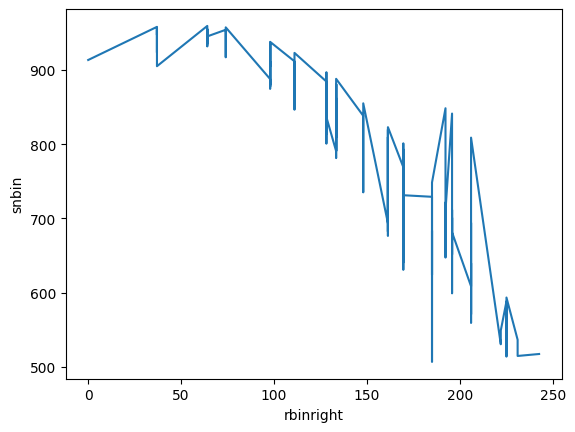

In [6]:
u.sn_radialbin(target_sn=500, lineid='6563', rmin=0, rmax=250, pertsim=False)
#print(u.snbinned_flux, u.flux)


78
[[ 1.39749023e-15  1.22823007e-15  4.68165190e-15 ... -3.65142986e-15
  -5.34518786e-15  6.71318885e-15]
 [ 1.57429679e-14 -1.55538966e-14  1.48003134e-14 ...  2.26215670e-15
   1.03031156e-14 -8.54083311e-15]
 [-2.35787741e-16  1.86431494e-14 -2.84346398e-15 ... -4.84981419e-15
   4.74521706e-15 -1.91361463e-14]
 ...
 [-6.04216655e-14  6.61182484e-16  4.08280384e-15 ... -5.38348561e-15
  -2.20614136e-14  3.09482224e-14]
 [ 1.15783915e-14  4.90634348e-15 -8.10477462e-15 ... -8.54545367e-15
   3.43702761e-14  4.24663288e-14]
 [-3.34830159e-14  4.32504239e-14  3.57843299e-15 ...  5.54295650e-15
  -1.62588110e-14  1.04350546e-14]]


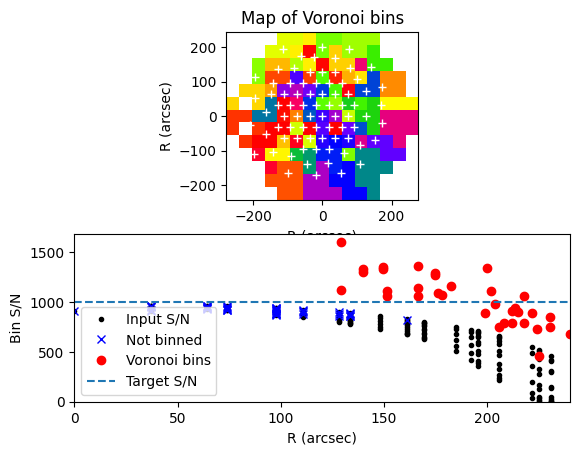

In [156]:
u.voronoibin(target_sn=1000, lineid='6563') #Caution: run once after fitting lines in native simulation

In [66]:
u.runpyneb(niter=6, pertsim=False)

warng _ManageAtomicData: rec data not available for Al2
warng _ManageAtomicData: rec data not available for Ar2
warng _ManageAtomicData: rec data not available for Ar3
warng _ManageAtomicData: rec data not available for Ar4
warng _ManageAtomicData: rec data not available for Ar5
warng _ManageAtomicData: rec data not available for Ba2
warng _ManageAtomicData: rec data not available for Ba4
ERROR None: No data for this case B
ERROR None: No data for this case B
warng _ManageAtomicData: rec data not available for Ca5
warng _ManageAtomicData: rec data not available for Cl2
warng _ManageAtomicData: rec data not available for Cl3
warng _ManageAtomicData: rec data not available for Cl4
warng _ManageAtomicData: rec data not available for Fe3
warng _ManageAtomicData: rec data not available for K4
warng _ManageAtomicData: rec data not available for K5
warng _ManageAtomicData: rec data not available for Mg5
warng _ManageAtomicData: rec data not available for Mg7
ERROR None: No data for this case 

(70.0, 100.0)

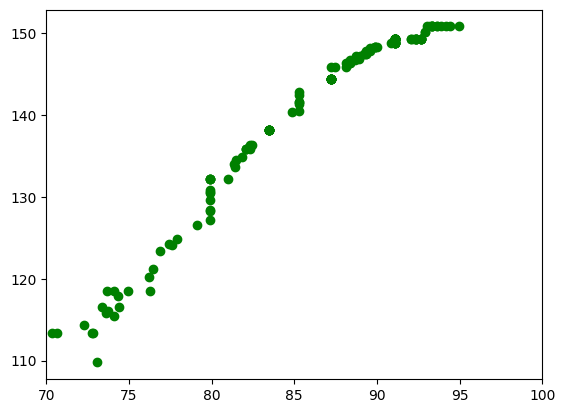

In [8]:
plt.scatter( u.linefitdict['neO2'], u.linefitdict['neS2'], color = 'green', label ='[OII] vs [SII]')
plt.xlim(70, 100)

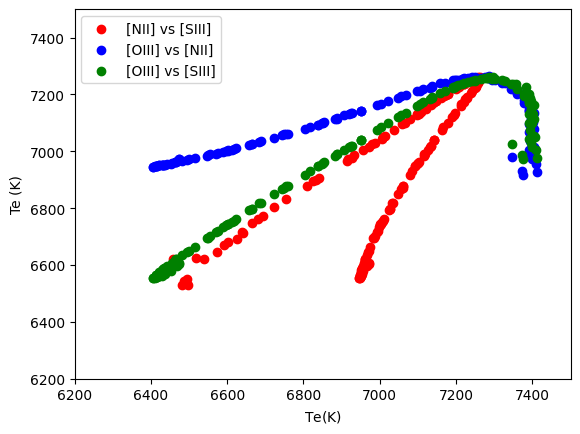

In [9]:
plt.scatter( u.linefitdict['TeN2'], u.linefitdict['TeS3'], color = 'red', label ='[NII] vs [SIII]')
plt.scatter( u.linefitdict['TeO3'], u.linefitdict['TeN2'], color = 'blue', label ='[OIII] vs [NII]')
plt.scatter( u.linefitdict['TeO3'], u.linefitdict['TeS3'], color = 'green', label ='[OIII] vs [SIII]')

plt.xlim(6200, 7500)
plt.ylim(6200, 7500)
plt.xlabel(r'$\mathrm{Te (K)}$')
plt.ylabel('Te (K)')
plt.legend(loc = 'upper left')

plt.show()

#plotdir=u.datadir+u.simname+'/'+u.simname +'_Te_plotprofile'+'/'
#if (not os.path.isdir(plotdir)):
#    os.mkdir(plotdir) 
#
#plt.savefig('/'+plotdir+'/'+'Te.png', dpi=300)


(6000.0, 10000.0)

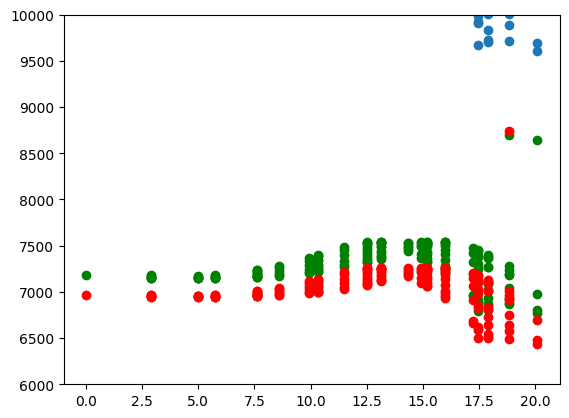

In [35]:
import astropy.units as unit
distance=16000 * unit.pc 
r=np.sqrt(u.linefitdict['delta_ra']**2+u.linefitdict['delta_dec']**2) 
rad=r*distance*np.pi/648000 # converting arcsecs to parsec 

plt.scatter(rad, u.linefitdict['TeS2'])
plt.scatter(rad, u.linefitdict['TeO2'], color ='green')
plt.scatter(rad, u.linefitdict['TeN2'], color ='red')
plt.ylim(6000, 10000)

/home/amrita/LVM/lvmnebular/lvmnebular.py:789: RuntimeWarning: invalid value encountered in scalar divide
  Teproj[i]=trapezoid(T0aux*aaux*neaux*np.cos(theta)**(-2), x=theta)/trapezoid(aaux*neaux*np.cos(theta)**(-2), x=theta)
/home/amrita/LVM/lvmnebular/lvmnebular.py:790: RuntimeWarning: invalid value encountered in scalar divide
  aproj[i]=trapezoid(aaux*neaux*np.cos(theta)**(-2), x=theta)/trapezoid(neaux*np.cos(theta)**(-2), x=theta)


ADF [OIII]: 0.11213300818280623
ADF [NII]: 0.0023963587992138205


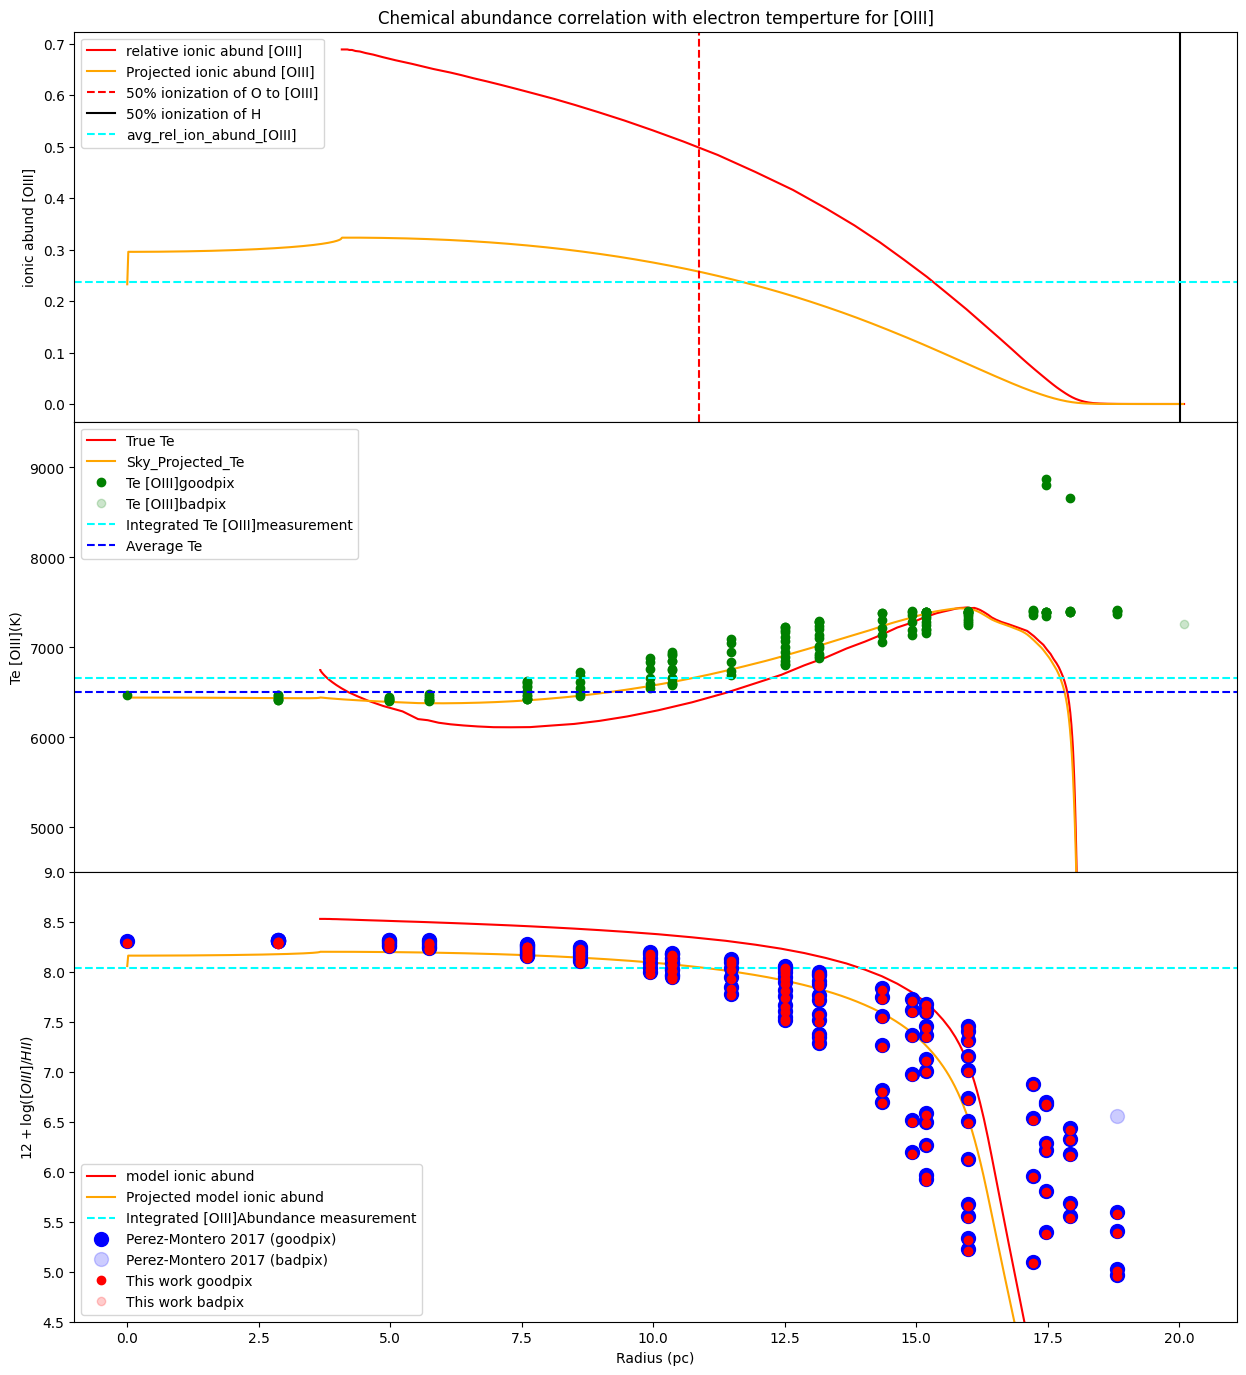

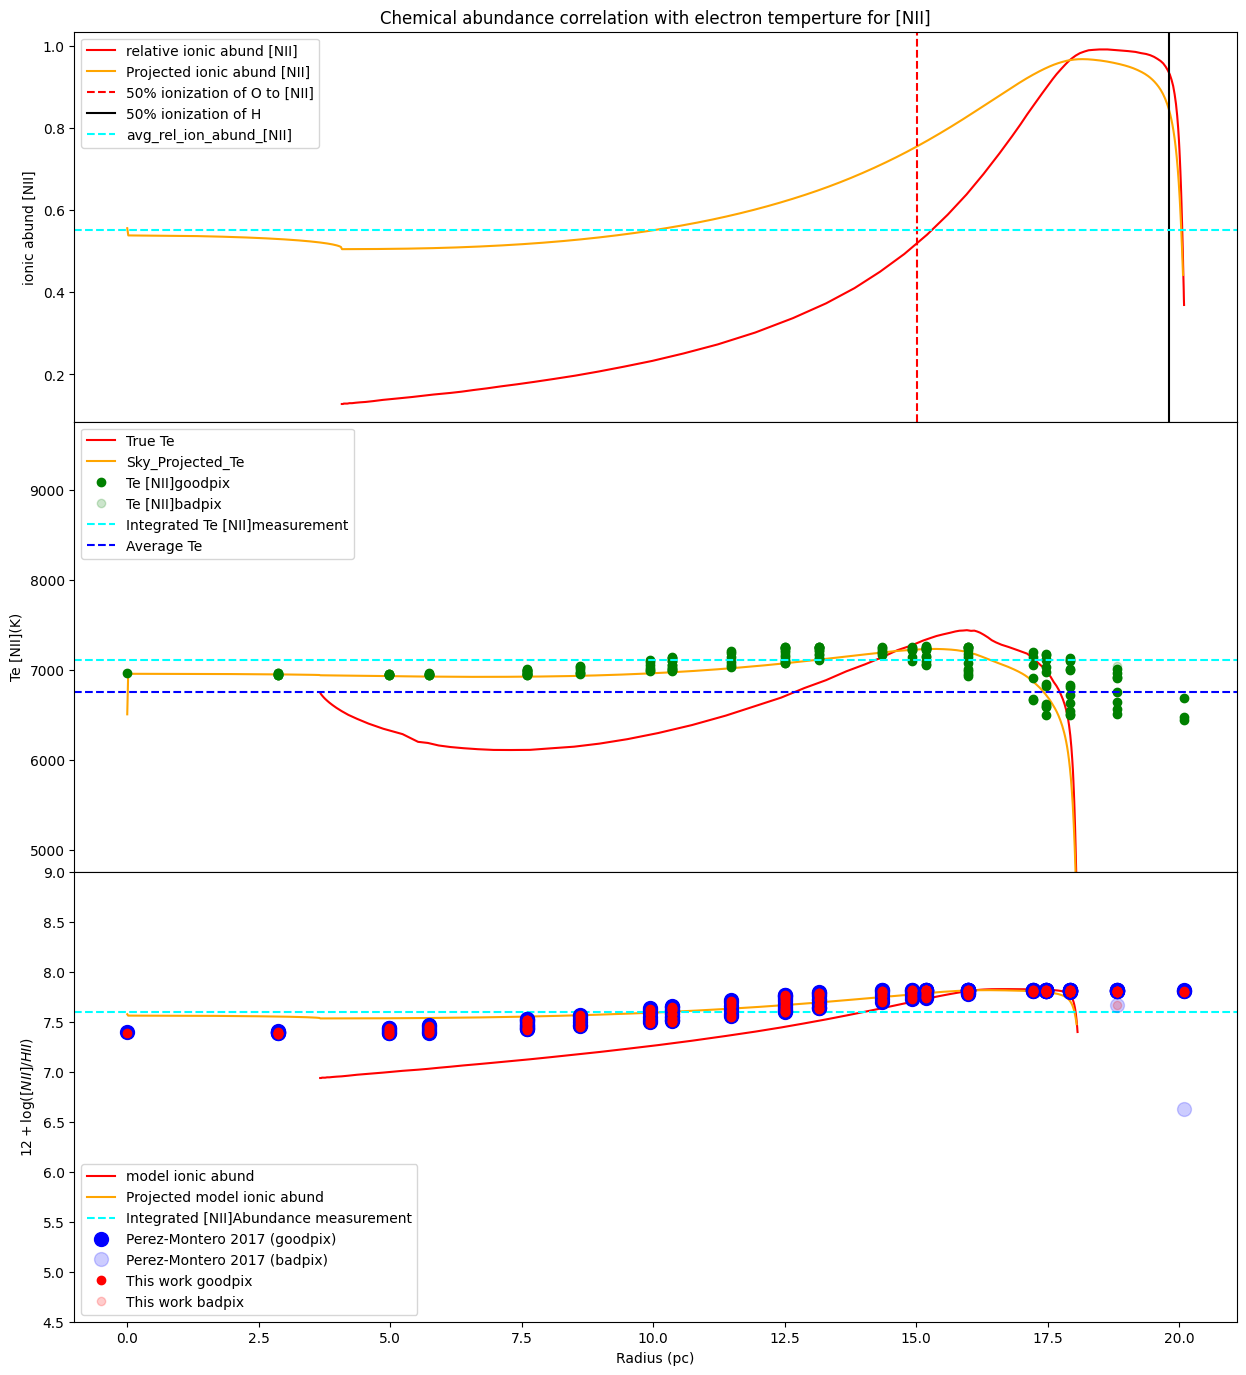

In [72]:
## def Te_Abund_plot(self, Te = self.linefitdict['TeO3], ion_vals = self.vals[6], integrated_te = self.int_TO3, integrated_abund = self.int_OppH,chem_abund, chem_abund_emp, testline = 4363, z = 1, log_ion_sun = -3.31, rad1 = 11.8, rad2 = 17.8, label = '[OIII]', outfilename = 'chem_abundO3_vs_R_present.png')

#Radius:0, 'Te':1, 'ne':2, 'H+':3, 'O0':4, 'O+':5, 'O++':6, 'N0':7, 'N+':8, 'N++':9, 'S0':10, 'S+':11, 'S++:12

#rad2 =18 mostly 0r 17.8

#rad1 = ([OIII]:11.2, [OII]:11.2, [NII]:13.8, [SIII]:17.6, [SII]: 17.6) -------- z=0.5
#rad1 = ([OIII]:9.78, [OII]:9.78, [NII]:13.36, [SIII]:17.35, [SII]: 17.35) -------- z=1
#rad1 = ([OIII]:11.92, [OII]:11.92, [NII]:14.15, [SIII]:17.5, [SII]: 17.5) -------- z=0.2
#rad1 = ([OIII]:11.17, [OII]:11.17, [NII]:13.83, [SIII]:17.5, [SII]: 17.5) -------- z=0.4
#rad1 = ([OIII]:10.75, [OII]:10.75, [NII]:13.65, [SIII]:17.41, [SII]: 17.41) -------- z=0.6
#rad1 = ([OIII]:10.26, [OII]:10.26, [NII]:13.44, [SIII]:17.33, [SII]: 17.33) -------- z=0.8

#log_ion_sun = -3.31 ----[O]
#log_ion_sun = -4.17 ----[N]
#log_ion_sun = -4.88 ----[S]

z1 = 1

#[OII]
#line = 3726    
#u.Integrated_meas()
#u.chem_abund(line)
#u.chem_abund_emperical(line)
#
#u.Te_Abund_plot(u.linefitdict['TeO2'], u.vals[5], u.int_TO2, u.int_OpH, u.OpH, u.Abund_O2,  testline = np.array(line), z = z1, log_ion_sun = -3.31, rad1 = 10, rad2 = 17.8, label = '[OII]', outfilename = 'O2_Te_chem_abund_vs_R_present.png')

#[OIII]
line = 4363  
u.Integrated_meas()
u.chem_abund(line)
u.chem_abund_emperical(line)
u.Te_Abund_plot(u.linefitdict['TeO3'], u.vals[6], u.int_TO3, u.int_OppH, u.OppH, u.Abund_O3,  testline = np.array(line), z = z1, log_ion_sun = -3.31, rad1 = 9.78, rad2 = 18, label = '[OIII]', outfilename = 'O3_Te_chem_abund_vs_R_present.png')

#[SII]
#line = 6716   
#u.Integrated_meas()
#u.chem_abund(line)
#u.chem_abund_emperical(line)
#u.Te_Abund_plot(u.linefitdict['TeS2'], u.vals[11], u.int_TS2, u.int_SpH, u.SpH, u.Abund_S2,  testline = np.array(line), z = z1, log_ion_sun = -4.88, rad1 = 17.2, rad2 = 17.8, label = '[SII]', outfilename = 'S2_Te_chem_abund_vs_R_present.png')
#
##[SIII]
#line = 6312  
#u.Integrated_meas()
#u.chem_abund(line)
#u.chem_abund_emperical(line)
#u.Te_Abund_plot(u.linefitdict['TeS3'], u.vals[12], u.int_TS3, u.int_SppH, u.SppH, u.Abund_S3,  testline = np.array(line), z = z1, log_ion_sun = -4.88, rad1 = 17.2, rad2 = 17.8, label = '[SIII]', outfilename = 'S3_Te_chem_abund_vs_R_present.png')
#

#[NII]
line = 5755   
u.Integrated_meas()
u.chem_abund(line)
u.chem_abund_emperical(line)
u.Te_Abund_plot(u.linefitdict['TeN2'], u.vals[8], u.int_TN2, u.int_NpH, u.NpH, u.Abund_N2,  testline = np.array(line), z = z1, log_ion_sun = -4.17, rad1 = 13.5, rad2 = 17.8, label = '[NII]', outfilename = 'N2_Te_chem_abund_vs_R_present.png')

In [177]:
u.Integrated_meas()

th: 0.8608456696813107 
 12+log10(O++/H+): 7.449634995081227


/home/amrita/LVM/lvmnebular/lvmnebular.py:789: RuntimeWarning: invalid value encountered in scalar divide
  Teproj[i]=trapezoid(T0aux*aaux*neaux*np.cos(theta)**(-2), x=theta)/trapezoid(aaux*neaux*np.cos(theta)**(-2), x=theta)
/home/amrita/LVM/lvmnebular/lvmnebular.py:790: RuntimeWarning: invalid value encountered in scalar divide
  aproj[i]=trapezoid(aaux*neaux*np.cos(theta)**(-2), x=theta)/trapezoid(neaux*np.cos(theta)**(-2), x=theta)


TypeError: loop of ufunc does not support argument 0 of type NoneType which has no callable log10 method

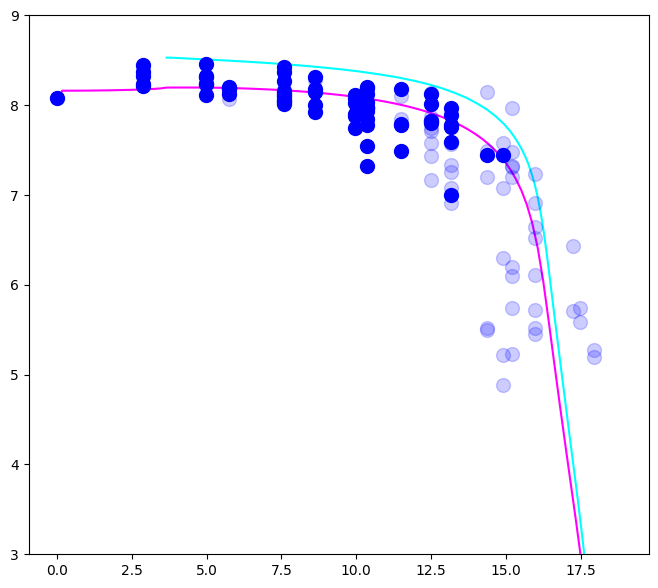

In [178]:
#Radius:0, 'Te':1, 'ne':2, 'H+':3, 'O0':4, 'O+':5, 'O++':6, 'N0':7, 'N+':8, 'N++':9, 'S0':10, 'S+':11, 'S++:12

import astropy.units as unit 
distance=16000 * unit.pc 
r=np.sqrt(u.linefitdict['delta_ra']**2+u.linefitdict['delta_dec']**2) 
rad=r*distance*np.pi/648000 # converting arcsecs to parsec 

##########################################################################[OIII]###########################################################################
#O++ abundance 
TeO3=u.linefitdict['TeO3'] 

u.projectedTe(u.vals[6], n=100) 
u.chem_abund(5007)

I_4959=u.linefitdict['4959_flux']
I_5007=u.linefitdict['5007_flux']
I_4861=u.linefitdict['4861_flux']
Th=u.linefitdict['TeO3']/1e4 
 
Abund_O3=np.log10(np.divide((I_4959+I_5007),I_4861))+6.1868+np.divide(1.2491,Th)-0.5816*np.log10(Th) # from Perez-Montero 20?? 
print('th:', np.nanmean(Th),'\n','12+log10(O++/H+):', np.nanmean(Abund_O3))

good=u.linefitdict['4363_flux']/u.linefitdict['4363_flux_err']>=3  
bad=u.linefitdict['4363_flux']/u.linefitdict['4363_flux_err']<3    

#Plots
fig, (ax)=plt.subplots(1, 1, sharex=True, figsize=(8,7))  
  
# O++ ionic abundance  
Zmodel = 1.0                                    # cloudy model abundance relative to solar  
logOHsun = -3.31                                # solar abundance patter from GASS (Grevesse et al 2010)  
logOHmodel = logOHsun + np.log10(Zmodel)        # total Oxygen elemental abundance in the model  
logOppHmodel = logOHmodel+np.log10(u.vals[6])   # ionic abundance of O++ in the model  
logOppHproj = logOHmodel+np.log10(u.aproj)      # ionic abundance of O++ in the model  ############################### highliting because I had put aproj[1:]to skip r=0 ##########################
  
ax.plot(u.vals[0], 12+logOppHmodel, color='cyan', label='model ionic abund')  
ax.plot(u.R, 12+logOppHproj, color='magenta', label='Projected model ionic abund')  
ax.set_ylim(3,9)  
  
ax.plot(rad[good], Abund_O3[good], 'o', color='blue', markersize='10', label='Perez-Montero 2017 (goodpix)')  
ax.plot(rad[bad], Abund_O3[bad], 'o', color='blue', markersize='10', label='Perez-Montero 2017 (badpix)', alpha=0.2)  
ax.plot(rad[good], 12+np.log10(u.OppH)[good], 'o', color='red', label='This work: goodpix')  
ax.plot(rad[bad], 12+np.log10(u.OppH)[bad], 'o', color='red', label='This work: badpix', alpha=0.2)  
  
ax.set_xlabel('Radius (pc)')  
#ax.set_ylabel('12+log10(O++/H+)') 
ax.set_ylabel(r'$12+\log(\frac{O^{++}}{H^+})$') 
ax.legend(loc='lower left')     

plotdir=u.datadir+u.simname+'/'+'Abundance_plots_'+u.simname +'/'
if (not os.path.isdir(plotdir)):
    os.mkdir(plotdir) 

plt.savefig('/'+plotdir+'/'+'chem_abundO3_vs_R_present.png', dpi=300)
#plt.savefig('/home/amrita/LVM/lvmnebular/Bubble_v2_5e-14/Bubble_v2_5e-14_snbinned/Bubble_v2_5e-14_snbinned_plotprofile/snbin_TeO3_chem_abundO3_vs_R.png', dpi=300)  
plt.show()  

In [ ]:
# Plot for [OII]

tl: 1.013023412970578 
 12+log10(O+/H+): 7.965997737834933


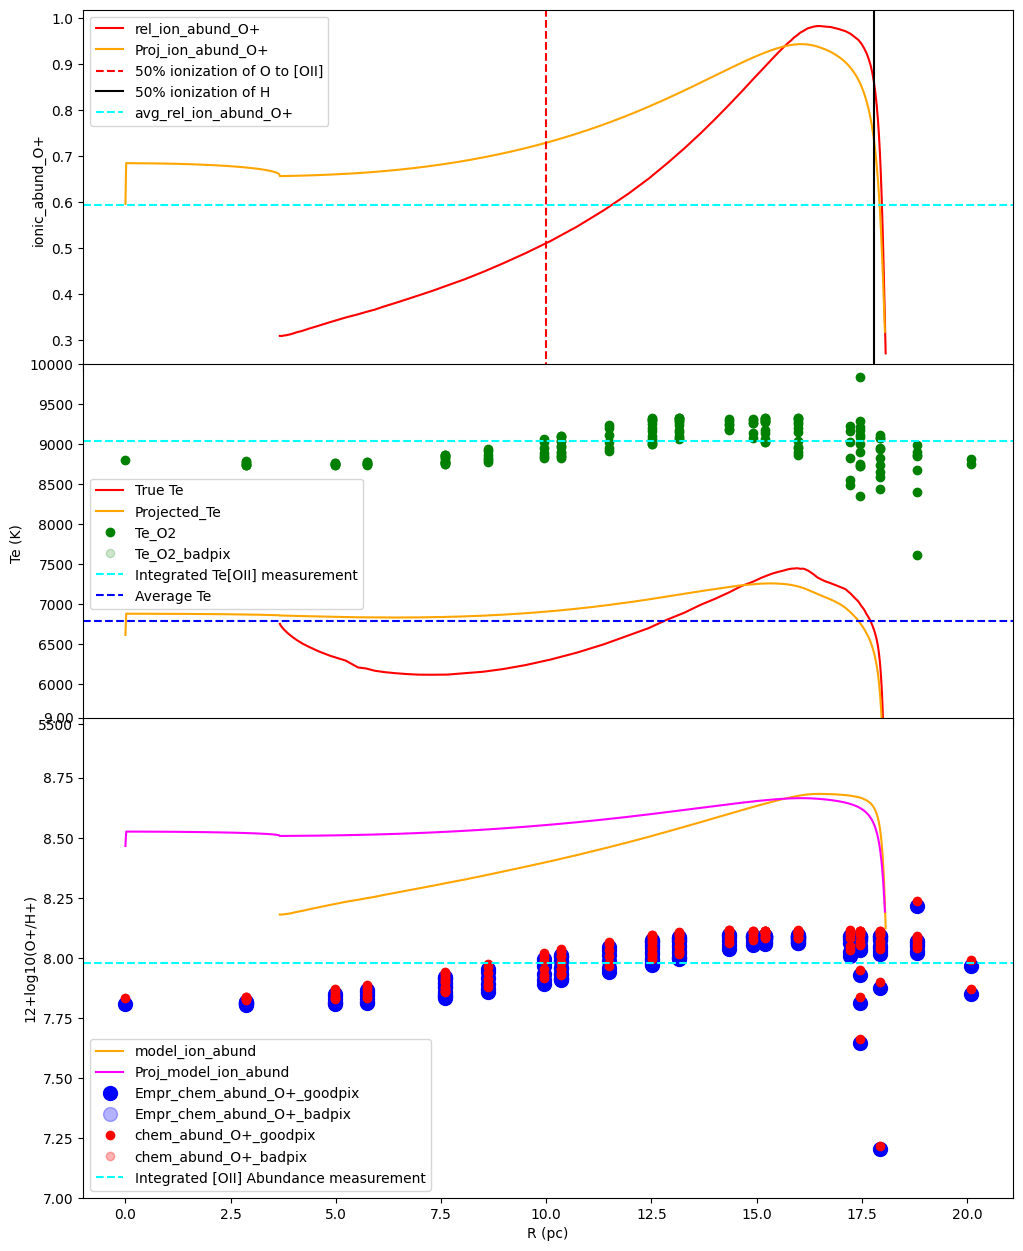

In [26]:
#Radius:0, 'Te':1, 'ne':2, 'H+':3, 'O0':4, 'O+':5, 'O++':6, 'N0':7, 'N+':8, 'N++':9, 'S0':10, 'S+':11, 'S++:12

import astropy.units as unit 
distance=16000 * unit.pc 
r=np.sqrt(u.linefitdict['delta_ra']**2+u.linefitdict['delta_dec']**2) 
rad=r*distance*np.pi/648000 # converting arcsecs to parsec 

#O+ 
u.projectedTe(u.vals[5]) 
u.chem_abund(3726)
u.avg_Te(u.vals[5])

#Chemical abundances of O+ and O++ from paper2 by Perez Montero 
I_3726=u.linefitdict['3726_flux'] 
I_3729=u.linefitdict['3729_flux'] 
I_4861=u.linefitdict['4861_flux'] 
Tl=u.linefitdict['TeO2']/1e4 
#Tl=1
TeO2=u.linefitdict['TeO2']

#Emperical formula to compute chemical abund  
Abund_O2=np.log10(np.divide((I_3726+I_3729),I_4861))+5.887+np.divide(1.641,Tl)-0.543*np.log10(Tl)+0.000114*u.linefitdict['neO2']
print('tl:', np.nanmean(Tl),'\n','12+log10(O+/H+):', np.nanmean(Abund_O2)) 

good=u.linefitdict['3726_flux']/u.linefitdict['3726_flux_err']>=3  
bad=u.linefitdict['3726_flux']/u.linefitdict['3726_flux_err']<3  

#Plots
fig, (ax3, ax4, ax5)=plt.subplots(3, 1, sharex=True, figsize=(12,12))  
ax3.plot(u.vals[0], u.vals[5], color='red', label='rel_ion_abund_O+')  
ax3.plot(u.R, u.aproj, color='orange', label='Proj_ion_abund_O+')  
ax3.axvline(x=10, c='red', linestyle='--', label='50% ionization of O to [OII]') 
ax3.axvline(x=17.8, c='black', label='50% ionization of H')  
ax3.axhline(y=np.average(u.vals[5]), c='cyan', linestyle='--', label='avg_rel_ion_abund_O+')  

ax3.legend(loc='upper left')  
ax3.set_ylabel('ionic_abund_O+') 
  
# Electron temperature plots   
ax4.plot(u.vals[0], u.vals[1], color='red', label='True Te')  
ax4.plot(u.R, u.Teproj, color='orange', label='Projected_Te')  
ax4.plot(rad[good], TeO2[good], 'o', color='green', label='Te_O2')  
ax4.plot(rad[bad], TeO2[bad], 'o', color='green', label='Te_O2_badpix', alpha=0.2)  
ax4.axhline(y=u.int_TO2, c='cyan', linestyle='--', label='Integrated Te[OII] measurement')
ax4.axhline(y= u.avgTe, color='blue', linestyle='--', label='Average Te')  

ax4.set_ylim(5500, 10000)
ax4.set_ylabel('Te (K)')  
ax4.legend()     
  
# O+ ionic abundance  
Zmodel= 1.0                                    # cloudy model abundance relative to solar  
logOHsun= -3.31                             # solar abundance patter from GASS (Grevesse et al 2010)  
logOHmodel = logOHsun + np.log10(Zmodel)    # total Oxygen elemental abundance in the model  
logOpHmodel = logOHmodel+np.log10(u.vals[5])# ionic abundance of O+ in the model  
logOpHproj = logOHmodel+np.log10(u.aproj)   # ionic abundance of O+ in the model  
  
ax5.plot(u.vals[0], 12+logOpHmodel, color='orange', label='model_ion_abund')  
ax5.plot(u.R, 12+logOpHproj, color='magenta', label='Proj_model_ion_abund')   
ax5.plot(rad[good], Abund_O2[good], 'o', color='blue', markersize='10', label='Empr_chem_abund_O+_goodpix')  
ax5.plot(rad[bad], Abund_O2[bad], 'o', color='blue', markersize='10', label='Empr_chem_abund_O+_badpix', alpha=0.3)  
ax5.plot(rad[good], 12+np.log10(u.OpH)[good], 'o', color='red', label='chem_abund_O+_goodpix')  
ax5.plot(rad[bad], 12+np.log10(u.OpH)[bad], 'o', color='red', label='chem_abund_O+_badpix', alpha=0.3)  

ax5.axhline(y = 12+np.log10(u.int_OpH), c='cyan', linestyle='--', label='Integrated [OII] Abundance measurement')  
ax5.set_ylim(7, 9)
ax5.set_xlabel('R (pc)')  
ax5.set_ylabel('12+log10(O+/H+)')  
ax5.legend(loc='lower left')     
  
ax3.set_position([0.125, 0.89, 0.775, 0.3])  # [left, bottom, width, height]  
ax4.set_position([0.125, 0.595, 0.775, 0.3])   
ax5.set_position([0.125, 0.2, 0.775, 0.4])  

plotdir=u.datadir+u.simname+'/'+'Abundance_plots_'+u.simname +'/'
if (not os.path.isdir(plotdir)):
    os.mkdir(plotdir) 

plt.savefig('/'+plotdir+'/'+'TeO2_chem_abundO2_vs_R.png', dpi=300)
#plt.savefig('/home/amrita/LVM/lvmnebular/Bubble_v2_5e-14/Bubble_v2_5e-14_snbinned/Bubble_v2_5e-14_snbinned_plotprofile/snbin_TeO3_chem_abundO3_vs_R.png', dpi=300)  
plt.show() 

In [ ]:
# Plot for [OIII]

th: 0.7816318454296859 
 12+log10(O++/H+): 7.315345298651858


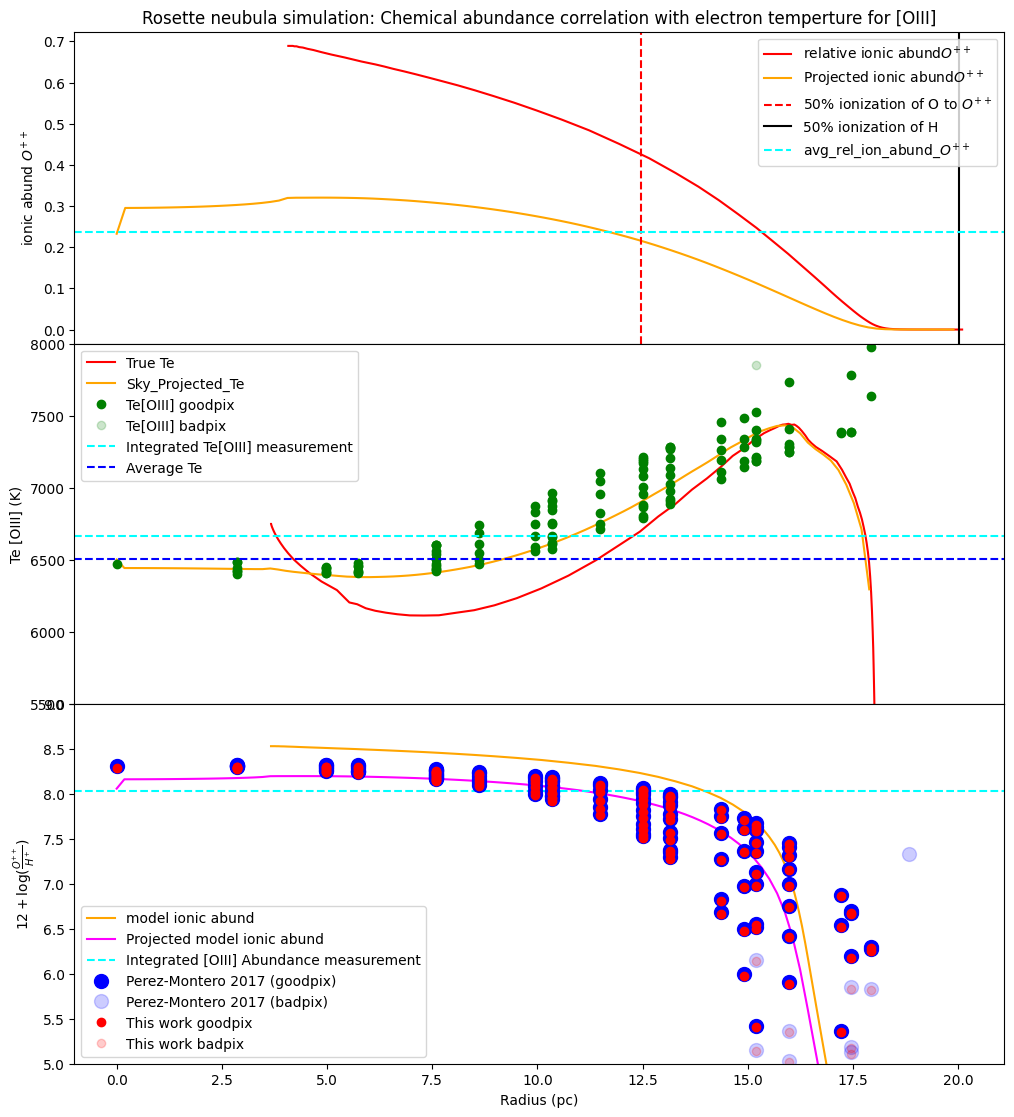

In [23]:
#Radius:0, 'Te':1, 'ne':2, 'H+':3, 'O0':4, 'O+':5, 'O++':6, 'N0':7, 'N+':8, 'N++':9, 'S0':10, 'S+':11, 'S++:12

import astropy.units as unit 
distance=16000 * unit.pc 
r=np.sqrt(u.linefitdict['delta_ra']**2+u.linefitdict['delta_dec']**2) 
rad=r*distance*np.pi/648000 # converting arcsecs to parsec 

#O++ abundance 
TeO3=u.linefitdict['TeO3'] 

u.projectedTe(u.vals[6], n=100) 
u.chem_abund(5007)
u.avg_Te(u.vals[6])

I_4959=u.linefitdict['4959_flux']
I_5007=u.linefitdict['5007_flux']
I_4861=u.linefitdict['4861_flux']
Th=u.linefitdict['TeO3']/1e4 
 
Abund_O3=np.log10(np.divide((I_4959+I_5007),I_4861))+6.1868+np.divide(1.2491,Th)-0.5816*np.log10(Th) # from Perez-Montero 2017
print('th:', np.nanmean(Th),'\n','12+log10(O++/H+):', np.nanmean(Abund_O3))

good=u.linefitdict['4363_flux']/u.linefitdict['4363_flux_err']>=3  
bad=u.linefitdict['4363_flux']/u.linefitdict['4363_flux_err']<3    

#relative ionic abundance plots
fig, (ax1, ax2, ax)=plt.subplots(3, 1, figsize=(12,12))  
ax1.plot(u.vals[0], u.vals[6], color='red', label='relative ionic abund'r'$ O^{++}$')  
ax1.plot(u.R, u.aproj, color='orange', label='Projected ionic abund' r'$ O^{++}$')  
ax1.axvline(x=10, c='red', linestyle='--', label='50% ionization of O to 'r'$ O^{++}$')  
ax1.axvline(x=18, c='black', label='50% ionization of H')
ax1.axhline(y=np.average(u.vals[6]), c='cyan', linestyle='--', label='avg_rel_ion_abund_$ O^{++}$')  

ax1.legend(loc='upper right')  
ax1.set_ylabel('ionic abund 'r'$ O^{++}$') 
ax1.set_title('Rosette neubula simulation: Chemical abundance correlation with electron temperture for [OIII]')
  
# Electron temperature plots   
ax2.plot(u.vals[0], u.vals[1], color='red', label='True Te')  
ax2.plot(u.R, u.Teproj, color='orange', label='Sky_Projected_Te')  
ax2.plot(rad[good], TeO3[good], 'o', color='green', label='Te[OIII] goodpix')  
ax2.plot(rad[bad], TeO3[bad], 'o', color='green',   label='Te[OIII] badpix', alpha=0.2) 
ax2.axhline(y=u.int_TO3, c='cyan', linestyle='--', label='Integrated Te[OIII] measurement')   
ax2.axhline(y=u.avgTe, c='blue', linestyle='--', label='Average Te')   
   

ax2.set_ylim(5500, 8000)
ax2.set_ylabel('Te [OIII] (K)')  
ax2.legend()     
  
# O++ ionic abundance  
Zmodel= 1.0                                    # cloudy model abundance relative to solar  
logOHsun= -3.31                               # solar abundance patter from GASS (Grevesse et al 2010)  
logOHmodel = logOHsun + np.log10(Zmodel)      # total Oxygen elemental abundance in the model  
logOppHmodel = logOHmodel+np.log10(u.vals[6]) # ionic abundance of O++ in the model  
logOppHproj = logOHmodel+np.log10(u.aproj)    # ionic abundance of O++ in the model  
  
ax.plot(u.vals[0], 12+logOppHmodel, color='orange', label='model ionic abund')  
ax.plot(u.R, 12+logOppHproj, color='magenta', label='Projected model ionic abund')  
ax.set_ylim(5,9)  
ax.axhline(y=12+np.log10(u.int_OppH), c='cyan', linestyle='--', label='Integrated [OIII] Abundance measurement')    

ax.plot(rad[good], Abund_O3[good], 'o', color='blue', markersize='10', label='Perez-Montero 2017 (goodpix)')  
ax.plot(rad[bad], Abund_O3[bad], 'o', color='blue', markersize='10', label='Perez-Montero 2017 (badpix)', alpha=0.2)  
ax.plot(rad[good], 12+np.log10(u.OppH)[good], 'o', color='red', label='This work goodpix')  
ax.plot(rad[bad], 12+np.log10(u.OppH)[bad], 'o', color='red', label='This work badpix', alpha=0.2)  
  
ax.set_xlabel('Radius (pc)')  
#ax.set_ylabel('12+log10(O++/H+)') 
ax.set_ylabel(r'$12+\log(\frac{O^{++}}{H^+})$') 
ax.legend(loc='lower left')     
  
ax1.set_position([0.125, 0.8, 0.775, 0.26])  # [left, bottom, width, height]  
ax2.set_position([0.125, 0.5, 0.775, 0.3])   
ax.set_position([0.125, 0.2, 0.775, 0.3])  

plotdir=u.datadir+u.simname+'/'+'Abundance_plots_'+u.simname +'/'
if (not os.path.isdir(plotdir)):
    os.mkdir(plotdir) 

plt.savefig('/'+plotdir+'/'+'TeO3_chem_abundO3_vs_R_present.png', dpi=200)
#plt.savefig('/home/amrita/LVM/lvmnebular/Bubble_v2_5e-14/Bubble_v2_5e-14_snbinned/Bubble_v2_5e-14_snbinned_plotprofile/snbin_TeO3_chem_abundO3_vs_R.png', dpi=300)  
plt.show()  

In [ ]:
# Plot for [NII]

/home/amrita/LVM/lvmnebular/lvmnebular.py:789: RuntimeWarning: invalid value encountered in scalar divide
  elif np.any(Ri>0) and np.any(Ri<= np.min(r0)):
/home/amrita/LVM/lvmnebular/lvmnebular.py:790: RuntimeWarning: invalid value encountered in scalar divide
  theta_max=np.arccos(Ri/np.max(R))*0.9999999


tl: 0.7209337850721084 
 12+log10(N+/H+): 7.652195292669482


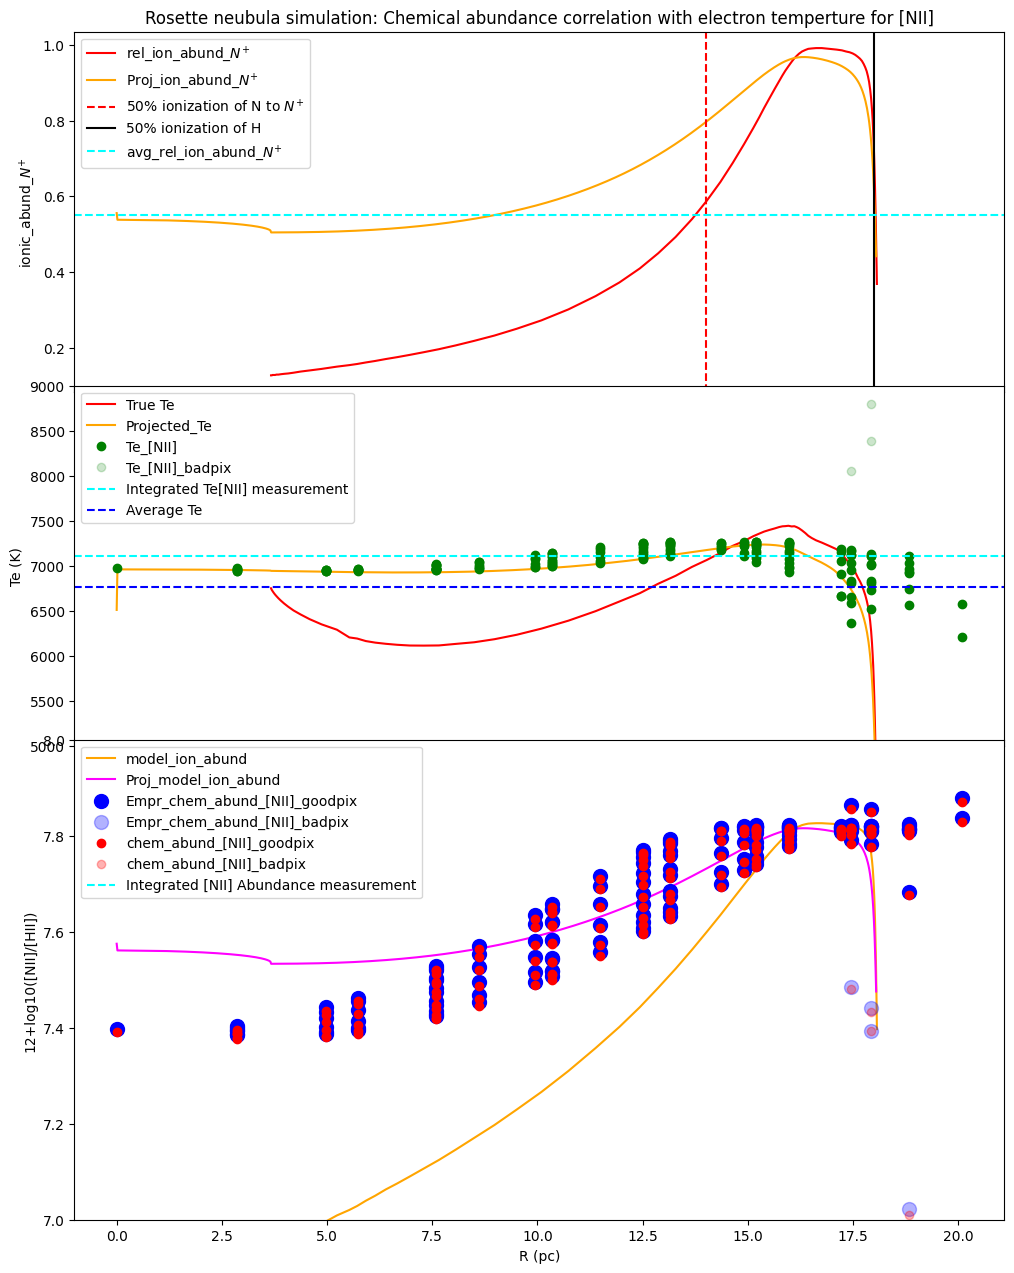

In [106]:
#Radius:0, 'Te':1, 'ne':2, 'H+':3, 'O0':4, 'O+':5, 'O++':6, 'N0':7, 'N+':8, 'N++':9, 'S0':10, 'S+':11, 'S++:12


import astropy.units as unit 
distance=16000 * unit.pc 
r=np.sqrt(u.linefitdict['delta_ra']**2+u.linefitdict['delta_dec']**2) 
rad=r*distance*np.pi/648000 # converting arcsecs to parsec 

#N+ 
u.projectedTe(u.vals[8]) 
u.chem_abund(6584)
u.avg_Te(u.vals[8])

#Chemical abundances of N+ from paper2 by Perez Montero 
I_5755=u.linefitdict['5755_flux'] 
I_6584=u.linefitdict['6584_flux'] 
I_6548=u.linefitdict['6548_flux'] 
I_4861=u.linefitdict['4861_flux'] 
Tl=u.linefitdict['TeN2']/1e4 
#Tl=1
TeN2=u.linefitdict['TeN2']

#Emperical formula to compute chemical abund  
Abund_N2=np.log10(np.divide((I_6548 + I_6584),I_4861))+6.291+np.divide(0.90221,Tl)-0.5511*np.log10(Tl)
print('tl:', np.nanmean(Tl),'\n','12+log10(N+/H+):', np.nanmean(Abund_N2)) 

good=u.linefitdict['5755_flux']/u.linefitdict['5755_flux_err']>=3  
bad=u.linefitdict['5755_flux']/u.linefitdict['5755_flux_err']<3  

#Plots
fig, (ax3, ax4, ax5)=plt.subplots(3, 1, sharex=True, figsize=(12,12))  
ax3.plot(u.vals[0], u.vals[8], color='red', label='rel_ion_abund_$N^{+}$')  
ax3.plot(u.R, u.aproj, color='orange', label='Proj_ion_abund_$N^{+}$')  
ax3.axvline(x=14, c='red', linestyle='--', label='50% ionization of N to $N^{+}$') 
ax3.axvline(x=18, c='black', label='50% ionization of H') 
ax3.axhline(y=np.average(u.vals[8]), c='cyan', linestyle='--', label='avg_rel_ion_abund_$N^{+}$') 
ax3.set_title('Rosette neubula simulation: Chemical abundance correlation with electron temperture for [NII]') 

ax3.legend(loc='upper left')  
ax3.set_ylabel('ionic_abund_$N^{+}$') 
  
# Electron temperature plots   
ax4.plot(u.vals[0], u.vals[1], color='red', label='True Te')  
ax4.plot(u.R, u.Teproj, color='orange', label='Projected_Te')  
ax4.plot(rad[good], TeN2[good], 'o', color='green',label='Te_[NII]')  
ax4.plot(rad[bad],  TeN2[bad], 'o', color='green', label='Te_[NII]_badpix', alpha=0.2)  
ax4.axhline(y = u.int_TN2, c='cyan', linestyle='--', label='Integrated Te[NII] measurement')
ax4.axhline(y = u.avgTe, c='blue', linestyle='--', label='Average Te')

ax4.set_ylim(5000, 9000)
ax4.set_ylabel('Te (K)')  
ax4.legend()     
  
# N+ ionic abundance  
Zmodel= 1.0                                         # cloudy model abundance relative to solar  
logNHsun= -4.17                                 # solar abundance patter from GASS (Grevesse et al 2010)  
logNHmodel =  logNHsun + np.log10(Zmodel)        # total Nitrogen elemental abundance in the model  
logNpHmodel = logNHmodel+np.log10(u.vals[8])    # ionic abundance of N+ in the model    
logNpHproj =  logNHmodel+np.log10(u.aproj)       # ionic abundance of N+ in the model  
  
ax5.plot(u.vals[0], 12+logNpHmodel, color='orange', label='model_ion_abund')  
ax5.plot(u.R, 12+logNpHproj, color='magenta', label='Proj_model_ion_abund')   
ax5.plot(rad[good], Abund_N2[good], 'o', color='blue', markersize='10', label='Empr_chem_abund_[NII]_goodpix')  
ax5.plot(rad[bad],  Abund_N2[bad], 'o', color='blue', markersize='10',  label='Empr_chem_abund_[NII]_badpix', alpha=0.3)  
ax5.plot(rad[good], 12+np.log10(u.NpH)[good], 'o', color='red', label='chem_abund_[NII]_goodpix')  
ax5.plot(rad[bad],  12+np.log10(u.NpH)[bad], 'o', color='red',  label='chem_abund_[NII]_badpix', alpha=0.3)  

ax5.axhline(y = 12+np.log10(u.int_NpH), c='cyan', linestyle='--', label='Integrated [NII] Abundance measurement')  
ax5.set_ylim(7, 8)
ax5.set_xlabel('R (pc)')  
ax5.set_ylabel('12+log10([NII]/[HII])')  
ax5.legend(loc='upper left')     
  
ax3.set_position([0.125, 0.89, 0.775, 0.3])  # [left, bottom, width, height]  
ax4.set_position([0.125, 0.595, 0.775, 0.3])   
ax5.set_position([0.125, 0.2, 0.775, 0.4])  

plotdir=u.datadir+u.simname+'/'+'Abundance_plots_'+u.simname +'/'
if (not os.path.isdir(plotdir)):
    os.mkdir(plotdir) 


#plt.savefig('/'+plotdir+'/'+'TeN2_chem_abundN2_vs_R_present.png', dpi=300)
#plt.savefig('/home/amrita/LVM/lvmnebular/Bubble_v2_5e-14/Bubble_v2_5e-14_snbinned/Bubble_v2_5e-14_snbinned_plotprofile/snbin_TeO3_chem_abundO3_vs_R.png', dpi=300)  
plt.show() 

In [ ]:
#Plot for [SIII]

/home/amrita/LVM/lvmnebular/lvmnebular.py:862: RuntimeWarning: invalid value encountered in scalar divide
  aproj[i]=trapezoid(aaux*neaux*np.cos(theta)**(-2), x=theta)/trapezoid(neaux*np.cos(theta)**(-2), x=theta)
/home/amrita/LVM/lvmnebular/lvmnebular.py:863: RuntimeWarning: invalid value encountered in scalar divide
  


tm: 0.7523299874522512 
 12+log10(S++/H+): 6.844561745831082


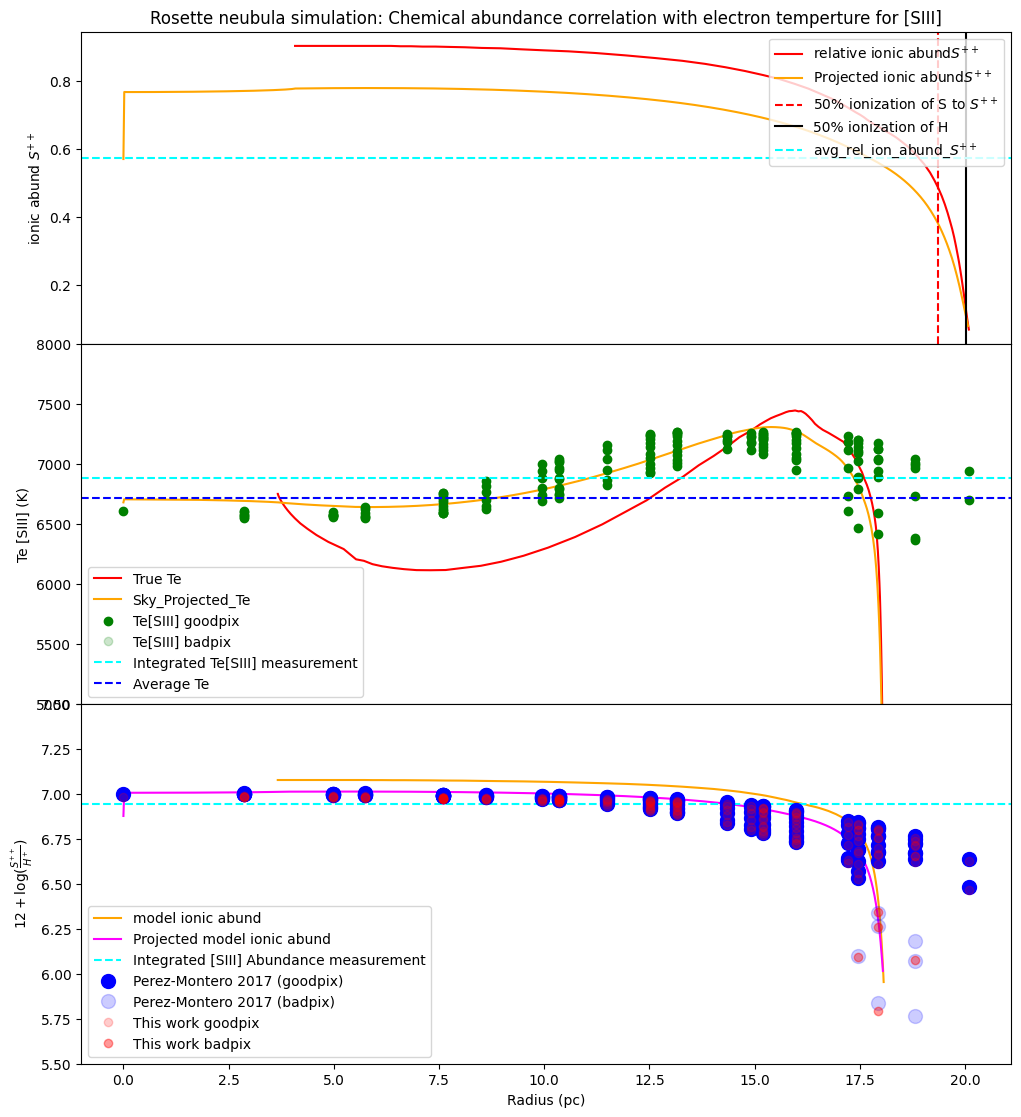

In [19]:
#Radius:0, 'Te':1, 'ne':2, 'H+':3, 'O0':4, 'O+':5, 'O++':6, 'N0':7, 'N+':8, 'N++':9, 'S0':10, 'S+':11, 'S++:12

import astropy.units as unit 
distance=16000 * unit.pc 
r=np.sqrt(u.linefitdict['delta_ra']**2+u.linefitdict['delta_dec']**2) 
rad=r*distance*np.pi/648000 # converting arcsecs to parsec 

#O++ abundance 
TeS3=u.linefitdict['TeS3'] 

u.projectedTe(u.vals[12]) 
u.chem_abund(9069)
u.avg_Te(u.vals[12])

I_9069=u.linefitdict['9069_flux']
I_9532=u.linefitdict['9532_flux']
I_4861=u.linefitdict['4861_flux']
Tm=u.linefitdict['TeS3']/1e4 
 
Abund_S3=np.log10(np.divide((I_9069+I_9532),I_4861))+5.983+np.divide(0.661,Tm)-0.527*np.log10(Tm) # from Perez-Montero 2017
print('tm:', np.nanmean(Tm),'\n','12+log10(S++/H+):', np.nanmean(Abund_S3))

good=u.linefitdict['6312_flux']/u.linefitdict['6312_flux_err']>=3  
bad=u.linefitdict[ '6312_flux']/u.linefitdict['6312_flux_err']<3    

#Plots
fig, (ax1, ax2, ax)=plt.subplots(3, 1, figsize=(12,12))  
ax1.plot(u.vals[0], u.vals[12], color='red', label='relative ionic abund'r'$ S^{++}$')  
ax1.plot(u.R, u.aproj, color='orange', label='Projected ionic abund' r'$ S^{++}$')  
ax1.axvline(x=17.4, c='red', linestyle='--', label='50% ionization of S to $S^{++}$')
ax1.axvline(x=18, c='black', label='50% ionization of H')  
ax1.axhline(y=np.average(u.vals[12]), c='cyan', linestyle='--', label='avg_rel_ion_abund_$ S^{++}$')  

ax1.legend(loc='upper right')  
ax1.set_ylabel('ionic abund 'r'$ S^{++}$') 
ax1.set_title('Rosette neubula simulation: Chemical abundance correlation with electron temperture for [SIII]')
  
# Electron temperature plots   
ax2.plot(u.vals[0], u.vals[1], color='red', label='True Te')  
ax2.plot(u.R, u.Teproj, color='orange', label='Sky_Projected_Te')  
ax2.plot(rad[good], TeS3[good], 'o', color='green', label='Te[SIII] goodpix')  
ax2.plot(rad[bad], TeS3[bad], 'o', color='green',   label='Te[SIII] badpix', alpha=0.2) 
ax2.axhline(y=u.int_TS3, c='cyan', linestyle='--', label='Integrated Te[SIII] measurement')   
ax2.axhline(y=u.avgTe, c='blue', linestyle='--', label='Average Te')   

ax2.set_ylim(5000, 8000)
ax2.set_ylabel('Te [SIII] (K)')  
ax2.legend()     
  
# S++ ionic abundance  
Zmodel= 1.0                                        # cloudy model abundance relative to solar  
logSHsun= -4.88                                # solar abundance patter from GASS (Grevesse et al 2010)  
logSHmodel = logSHsun + np.log10(Zmodel)       # total Oxygen elemental abundance in the model  
logSppHmodel = logSHmodel+np.log10(u.vals[12]) # ionic abundance of S++ in the model  
logSppHproj = logSHmodel+np.log10(u.aproj)     # ionic abundance of S++ in the model  

ax.plot(u.vals[0], 12+logSppHmodel, color='orange', label='model ionic abund')  
ax.plot(u.R, 12+logSppHproj, color='magenta', label='Projected model ionic abund')  
#ax.set_ylim(5,8.5)  
ax.axhline(y=12+np.log10(u.int_SppH), c='cyan', linestyle='--', label='Integrated [SIII] Abundance measurement')    

ax.plot(rad[good], Abund_S3[good], 'o', color='blue', markersize='10', label='Perez-Montero 2017 (goodpix)')  
ax.plot(rad[bad],  Abund_S3[bad], 'o', color='blue', markersize='10', label='Perez-Montero 2017 (badpix)', alpha=0.2)  
ax.plot(rad[good], 12+np.log10(u.SppH)[good], 'o', color='red', label='This work goodpix', alpha=0.2)  
ax.plot(rad[bad],  12+np.log10(u.SppH)[bad], 'o', color='red', label='This work badpix', alpha=0.4)  
ax.set_ylim(5.5, 7.5)  
ax.set_xlabel('Radius (pc)')  
#ax.set_ylabel('12+log10(O++/H+)') 
ax.set_ylabel(r'$12+\log(\frac{S^{++}}{H^+})$') 
ax.legend(loc='lower left')     
  
ax1.set_position([0.125, 0.8, 0.775, 0.26])  # [left, bottom, width, height]  
ax2.set_position([0.125, 0.5, 0.775, 0.3])   
ax.set_position([0.125, 0.2, 0.775, 0.3])  

plotdir=u.datadir+u.simname+'/'+'Abundance_plots_'+u.simname +'/'
if (not os.path.isdir(plotdir)):
    os.mkdir(plotdir) 

plt.savefig('/'+plotdir+'/'+'TeS3_chem_abundS3_vs_R_present.png', dpi=200)
#plt.savefig('/home/amrita/LVM/lvmnebular/Bubble_v2_5e-14/Bubble_v2_5e-14_snbinned/Bubble_v2_5e-14_snbinned_plotprofile/snbin_TeO3_chem_abundO3_vs_R.png', dpi=300)  
plt.show()  

In [ ]:
#[SII]

/home/amrita/LVM/lvmnebular/lvmnebular.py:860: RuntimeWarning: invalid value encountered in scalar divide
  Teproj[i]=trapezoid(T0aux*aaux*np.cos(theta)**(-2), x=theta)/trapezoid(aaux*np.cos(theta)**(-2), x=theta)
/home/amrita/LVM/lvmnebular/lvmnebular.py:861: RuntimeWarning: invalid value encountered in scalar divide
  aproj[i]=trapezoid(aaux*np.cos(theta)**(-2), x=theta)/trapezoid(np.cos(theta)**(-2), x=theta)


tl: 0.6092925189435492 
 12+log10(S+/H+): 6.85861212411355


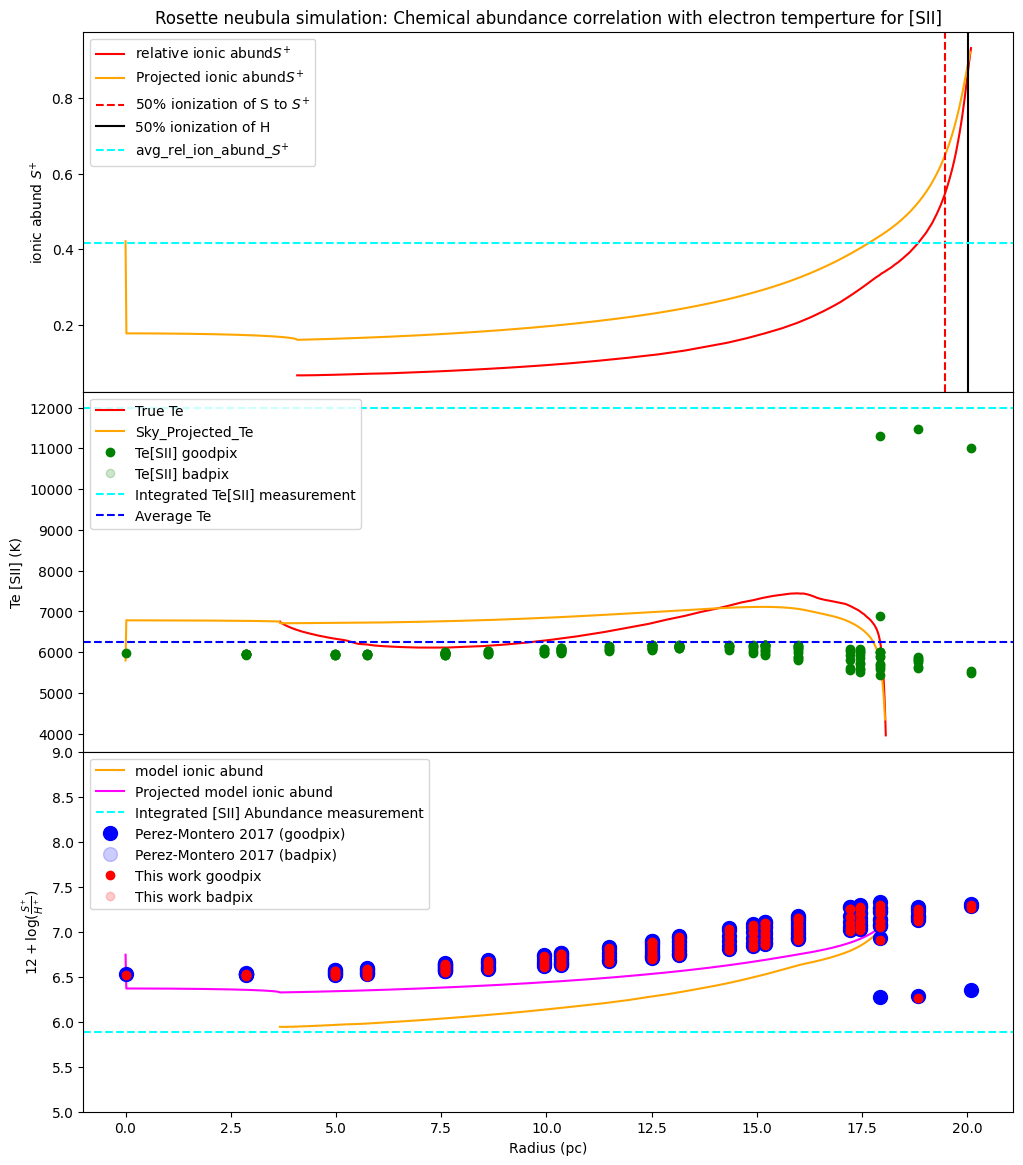

In [162]:
#Radius:0, 'Te':1, 'ne':2, 'H+':3, 'O0':4, 'O+':5, 'O++':6, 'N0':7, 'N+':8, 'N++':9, 'S0':10, 'S+':11, 'S++:12

import astropy.units as unit 
distance=16000 * unit.pc 
r=np.sqrt(u.linefitdict['delta_ra']**2+u.linefitdict['delta_dec']**2) 
rad=r*distance*np.pi/648000 # converting arcsecs to parsec 

#S+ abundance 
TeS2=u.linefitdict['TeS2'] 

u.projectedTe(u.vals[11]) 
u.chem_abund(6731)
u.avg_Te(u.vals[11])

#Chemical abundances of S+ from paper2 by Perez Montero 
I_6716=u.linefitdict['6716_flux'] 
I_6731=u.linefitdict['6731_flux'] 
I_4861=u.linefitdict['4861_flux'] 
Tl=u.linefitdict['TeS2']/1e4 

#Emperical formula to compute chemical abund  
Abund_S2=np.log10(np.divide((I_6716+I_6731),I_4861))+5.463+np.divide(0.941,Tl)-0.37*np.log10(Tl)
print('tl:', np.nanmean(Tl),'\n','12+log10(S+/H+):', np.nanmean(Abund_S2)) 


good=u.linefitdict['6716_flux']/u.linefitdict['6716_flux_err']>=3  
bad= u.linefitdict['6716_flux']/u.linefitdict['6716_flux_err']<3    

#Plots
fig, (ax1, ax2, ax)=plt.subplots(3, 1, figsize=(12,12))  
ax1.plot(u.vals[0], u.vals[11], color='red', label='relative ionic abund'r'$ S^{+}$')  
ax1.plot(u.R, u.aproj, color='orange', label='Projected ionic abund' r'$ S^{+}$')  
ax1.axvline(x=17.5, c='red', linestyle='--', label='50% ionization of S to $ S^{+}$') 
ax1.axvline(x=18, c='black', label='50% ionization of H')  
ax1.axhline(y=np.average(u.vals[11]), c='cyan', linestyle='--', label='avg_rel_ion_abund_$S^{+}$')  

ax1.legend(loc='upper left')  
ax1.set_ylabel('ionic abund 'r'$ S^{+}$') 
ax1.set_title('Rosette neubula simulation: Chemical abundance correlation with electron temperture for [SII]')
  
# Electron temperature plots   
ax2.plot(u.vals[0], u.vals[1], color='red', label='True Te') 
ax2.plot(u.R, u.Teproj, color='orange', label='Sky_Projected_Te')  
ax2.plot(rad[good], TeS2[good], 'o', color='green', label='Te[SII] goodpix')  
ax2.plot(rad[bad], TeS2[bad], 'o', color='green',   label='Te[SII] badpix', alpha=0.2) 
ax2.axhline(y=u.int_TS2, c='cyan', linestyle='--', label='Integrated Te[SII] measurement')   
ax2.axhline(y = u.avgTe, color='blue', linestyle='--', label='Average Te')  

#ax2.set_ylim(7000, 15000)
ax2.set_ylabel('Te [SII] (K)')  
ax2.legend(loc='upper left')     
  
# O++ ionic abundance  
Zmodel= 1.0                                      # cloudy model abundance relative to solar  
logSHsun= -4.88                                # solar abundance patter from GASS (Grevesse et al 2010)  
logSHmodel = logSHsun + np.log10(Zmodel)       # total Oxygen elemental abundance in the model  
logSpHmodel = logSHmodel+np.log10(u.vals[11])  # ionic abundance of S+ in the model  
logSpHproj = logSHmodel+np.log10(u.aproj)      # ionic abundance of S+ in the model  

ax.plot(u.vals[0], 12+logSpHmodel, color='orange', label='model ionic abund')  
ax.plot(u.R, 12+logSpHproj, color='magenta', label='Projected model ionic abund')  
#ax.set_ylim(3,9)  
ax.axhline(y=12+np.log10(u.int_SpH), c='cyan', linestyle='--', label='Integrated [SII] Abundance measurement')    

ax.plot(rad[good], Abund_S2[good], 'o', color='blue', markersize='10', label='Perez-Montero 2017 (goodpix)')  
ax.plot(rad[bad],  Abund_S2[bad], 'o', color='blue', markersize='10', label='Perez-Montero 2017 (badpix)', alpha=0.2)  
ax.plot(rad[good], 12+np.log10(u.SpH)[good], 'o', color='red', label='This work goodpix')  
ax.plot(rad[bad],  12+np.log10(u.SpH)[bad], 'o', color='red', label='This work badpix', alpha=0.2)  
ax.set_ylim(5, 9)  
ax.set_xlabel('Radius (pc)')  
#ax.set_ylabel('12+log10(O++/H+)') 
ax.set_ylabel(r'$12+\log(\frac{S^{+}}{H^+})$') 
ax.legend(loc='upper left')     
  
ax1.set_position([0.125, 0.8, 0.775, 0.3])  # [left, bottom, width, height]  
ax2.set_position([0.125, 0.5, 0.775, 0.3])   
ax.set_position([0.125, 0.2, 0.775, 0.3])  

plotdir=u.datadir+u.simname+'/'+'Abundance_plots_'+u.simname +'/'
if (not os.path.isdir(plotdir)):
    os.mkdir(plotdir) 

plt.savefig('/'+plotdir+'/'+'TeS2_chem_abundS2_vs_R_present.png', dpi=200)

#plt.savefig('/'+plotdir+'/'+'u.simname+snbinned+'/'+u.simname+_snbinned_plotprofile/snbin_TeO3_chem_abundO3_vs_R.png', dpi=300)  
plt.show()  

In [ ]:
#Overplot profiles

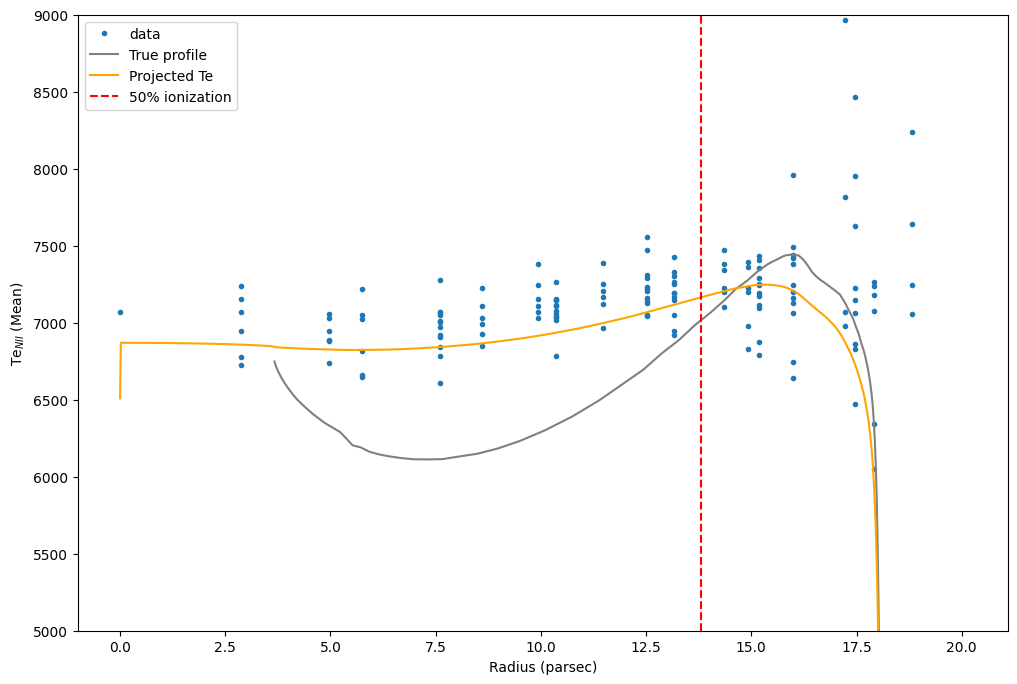

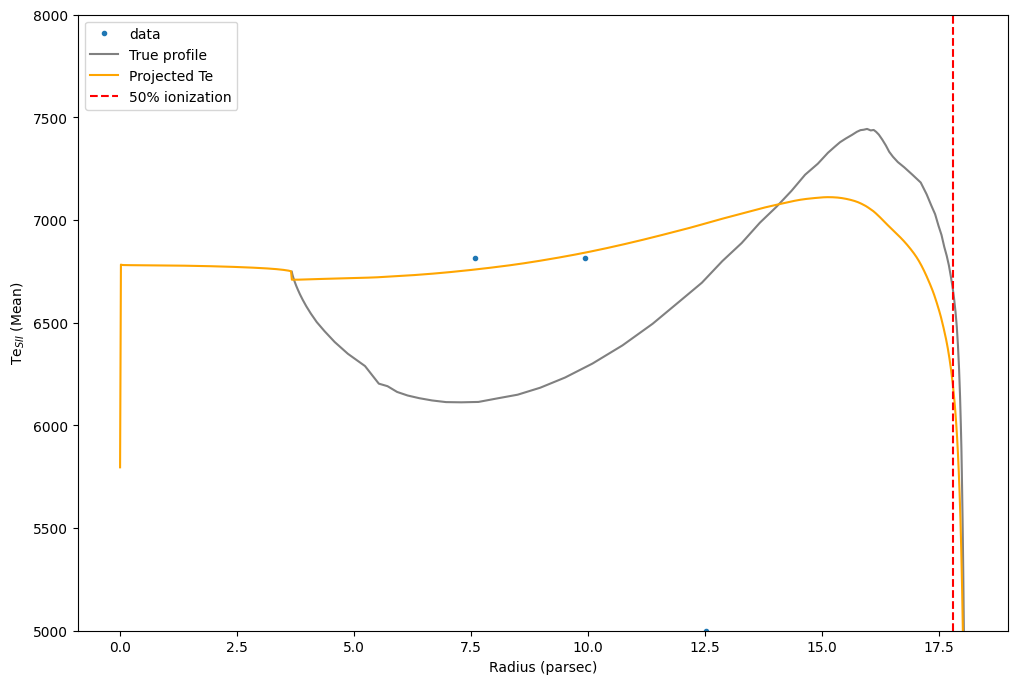

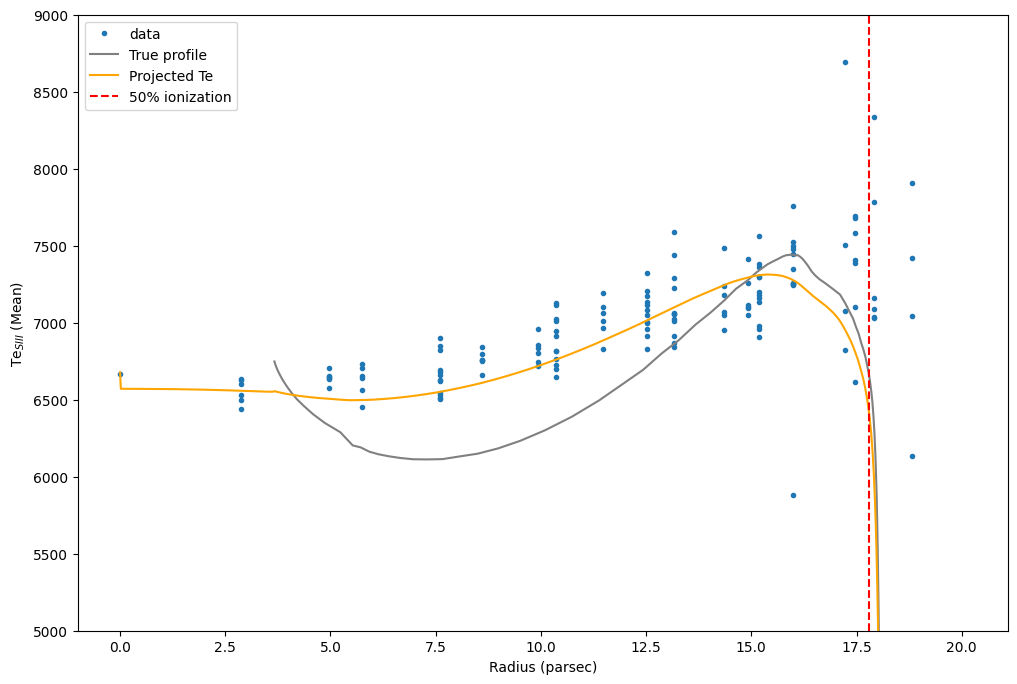

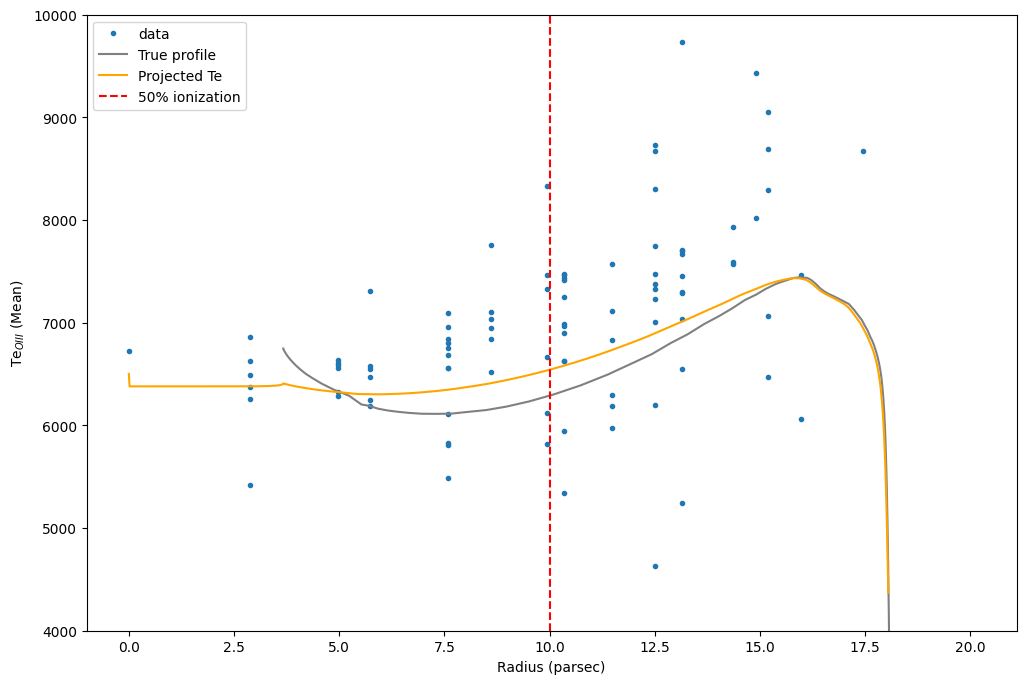

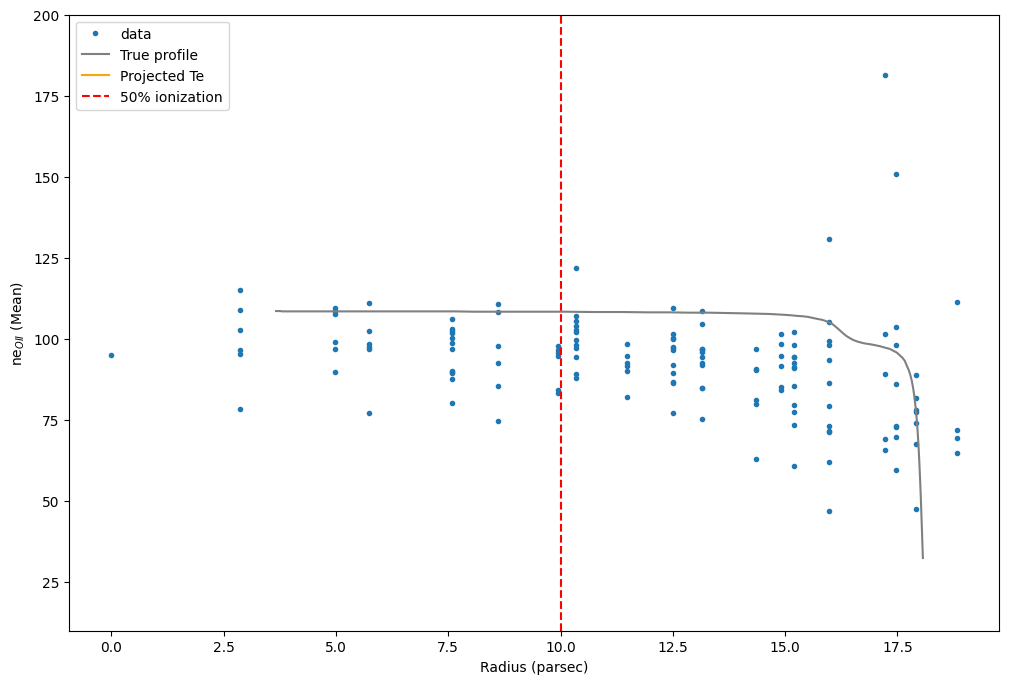

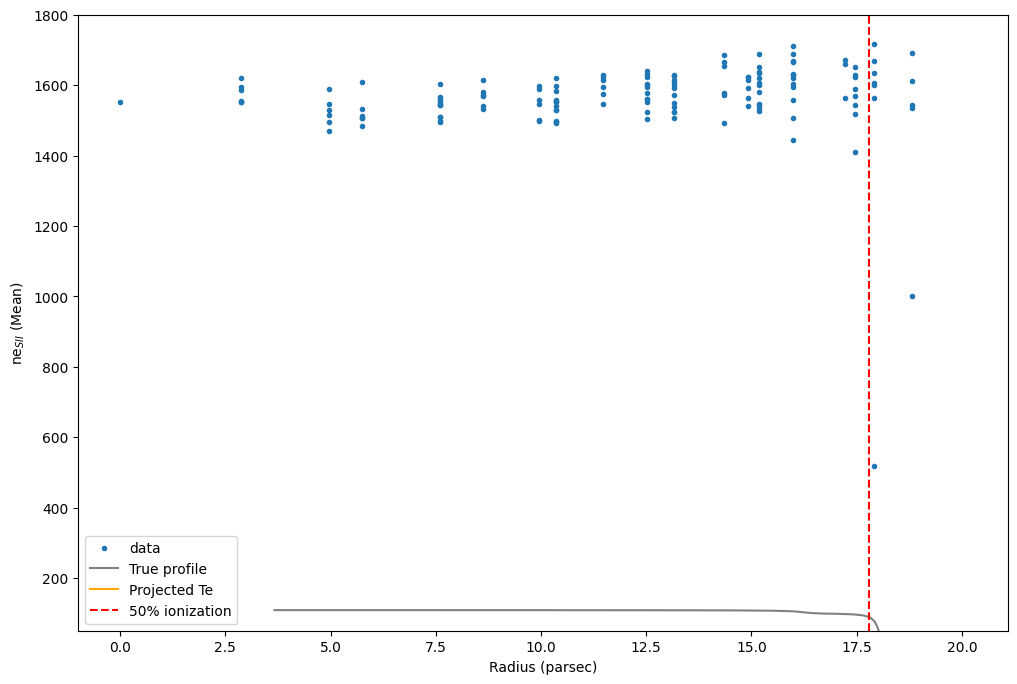

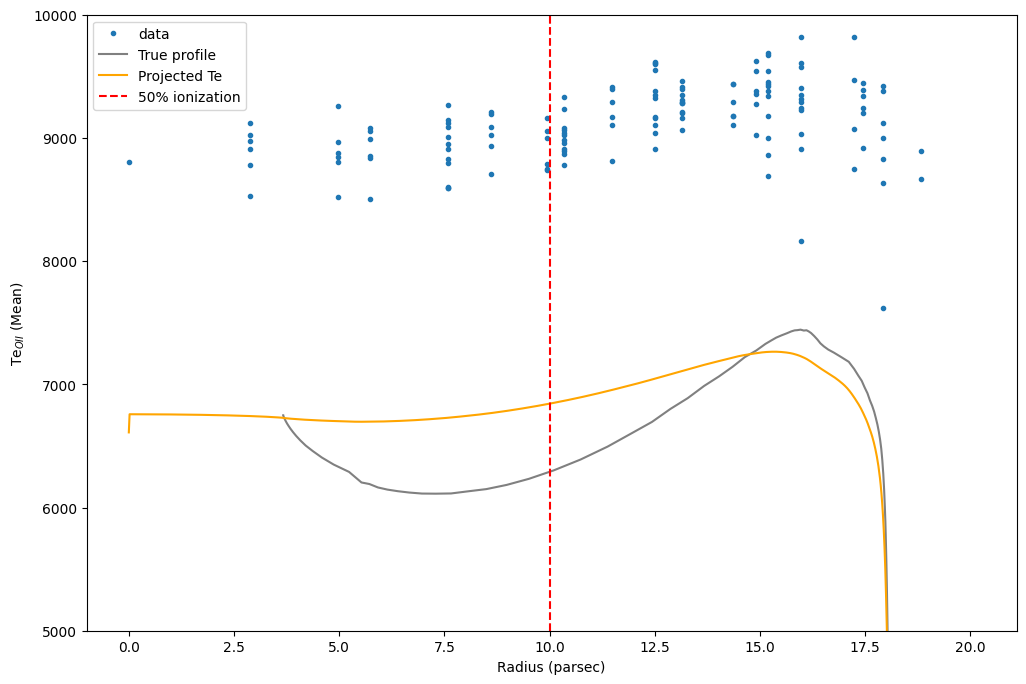

In [108]:
#Radius:0, 'Te':1, 'ne':2, 'H+':3, 'O0':4, 'O+':5, 'O++':6, 'N0':7, 'N+':8, 'N++':9, 'S0':10, 'S+':11, 'S++:12
#def overplotprofile(self, z, val1, val2, min, max, x, n, title='line_map', output='line_map', radbin=False, vorbin=False, snbin=False, pertsim=False)

u.overplotprofile(u.linefitdict['TeN2'], u.vals[1], u.vals[8],  5000 , 9000, 13.8, title=r'Te$_{NII}$ (Mean)', output='TeN2',  radbin=False, vorbin=False,  snbin=False)
u.overplotprofile(u.linefitdict['TeS2'], u.vals[1], u.vals[11], 5000 , 8000, 17.8, title=r'Te$_{SII}$ (Mean)', output='TeS2',  radbin=False, vorbin=False,  snbin=False)
u.overplotprofile(u.linefitdict['TeS3'], u.vals[1], u.vals[12], 5000 , 9000, 17.8, title=r'Te$_{SIII}$ (Mean)', output='TeS3', radbin=False, vorbin=False,  snbin=False)
u.overplotprofile(u.linefitdict['TeO3'], u.vals[1], u.vals[6],  4000 , 10000,10.0, title=r'Te$_{OIII}$ (Mean)', output='TeO3',radbin=False, vorbin=False,  snbin=False)
u.overplotprofile(u.linefitdict['neO2'], u.vals[2], u.vals[5],  10 , 200,    10.0, title=r'ne$_{OII}$ (Mean)', output='neO2',     radbin=False, vorbin=False,  snbin=False)
u.overplotprofile(u.linefitdict['neS2'], u.vals[2], u.vals[11], 50 , 1800,   17.8, title=r'ne$_{SII}$ (Mean)', output='neS2',    radbin=False, vorbin=False,  snbin=False)
u.overplotprofile(u.linefitdict['TeO2'], u.vals[1], u.vals[5],  5000 , 10000,10.0, title=r'Te$_{OII}$ (Mean)', output='TeO2', radbin=False, vorbin=False,  snbin=False)

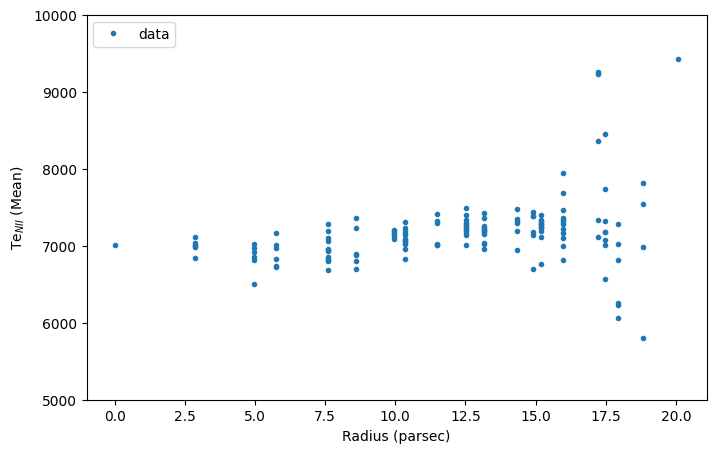

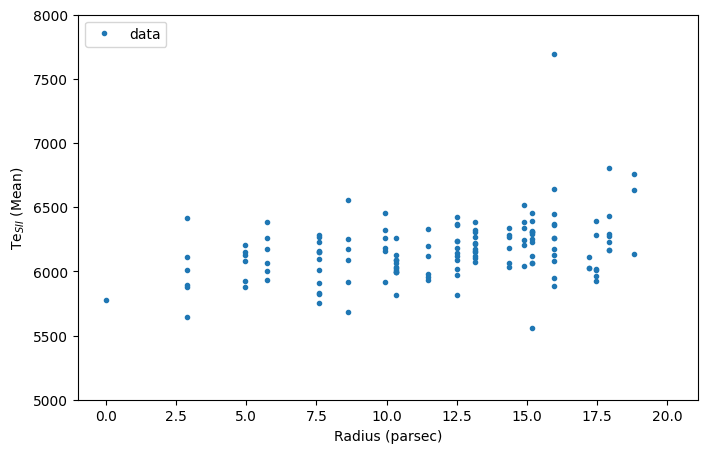

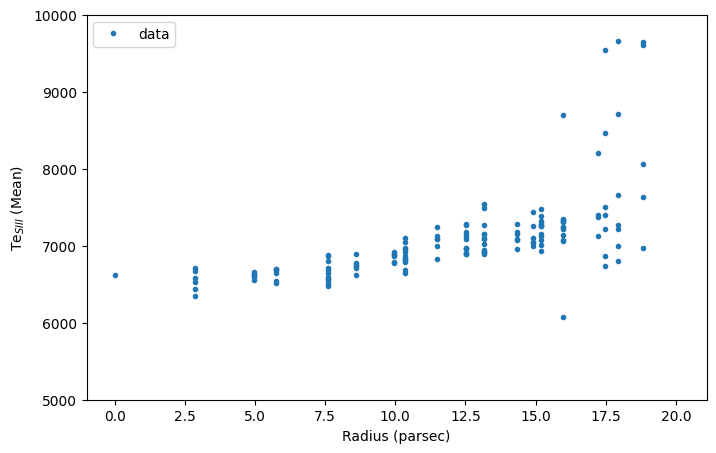

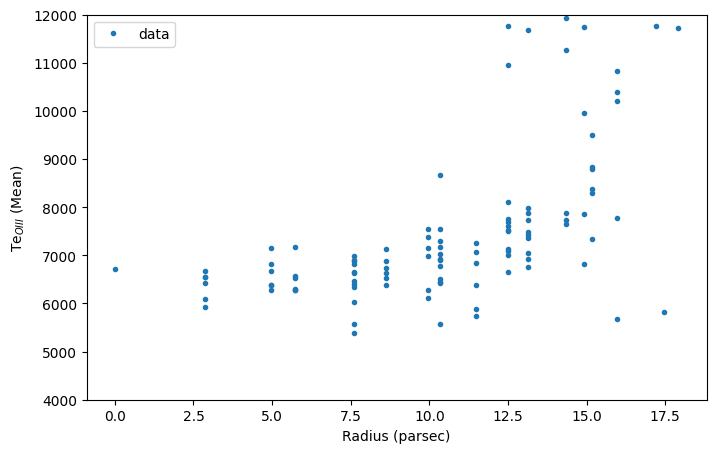

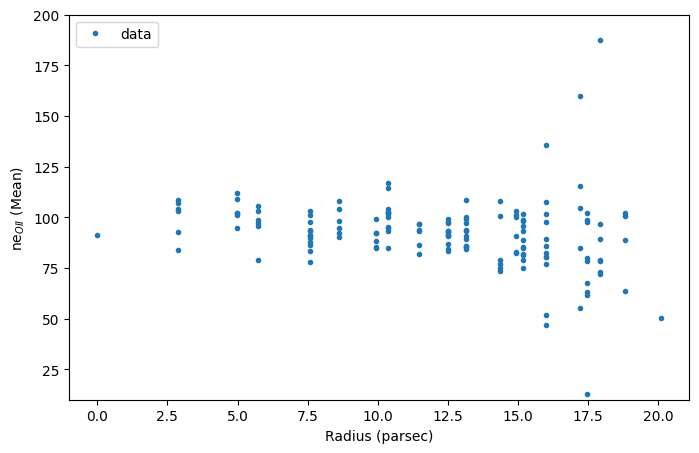

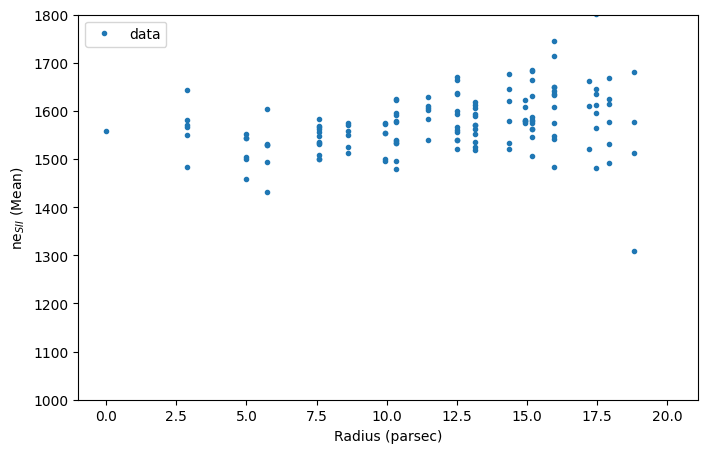

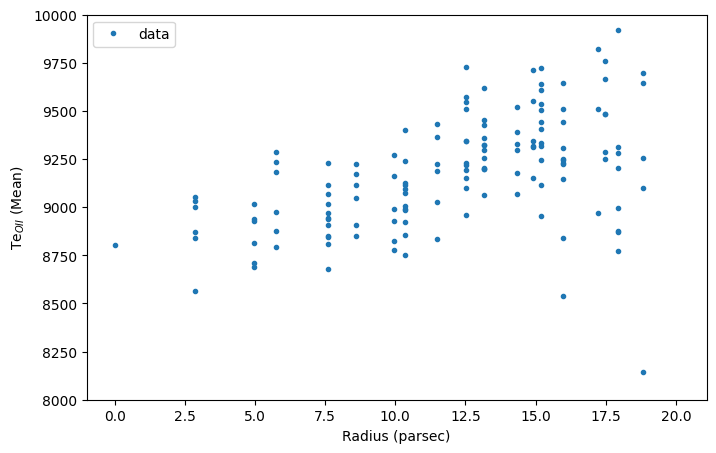

In [64]:
#MakeRadialbin plot profiles
u.plotprofile(u.linefitdict['TeN2'], 5000 , 10000, title=r'Te$_{NII}$ (Mean)', output='TeN2', radbin=False, snbin=False)
u.plotprofile(u.linefitdict['TeS2'], 5000 , 8000, title=r'Te$_{SII}$ (Mean)', output='TeS2',  radbin=False, snbin=False)
u.plotprofile(u.linefitdict['TeS3'], 5000 , 10000, title=r'Te$_{SIII}$ (Mean)', output='TeS3',radbin=False, snbin=False)
u.plotprofile(u.linefitdict['TeO3'], 4000 , 12000, title=r'Te$_{OIII}$ (Mean)', output='TeO3',radbin=False, snbin=False)
u.plotprofile(u.linefitdict['neO2'], 10 , 200, title=r'ne$_{OII}$ (Mean)', output='neO2',     radbin=False, snbin=False)
u.plotprofile(u.linefitdict['neS2'], 1000 , 1800, title=r'ne$_{SII}$ (Mean)', output='neS2',  radbin=False, snbin=False)
u.plotprofile(u.linefitdict['TeO2'], 8000 , 10000, title=r'Te$_{OII}$ (Mean)', output='TeO2', radbin=False, snbin=False)



In [42]:
simname =['Bubble_v2_1e-8','Bubble_v2_1e-8_z_0.2']

s = simname[1].split('_')
if len(s)==5:
    z=s[4]
else:
     z=1
#if len(s)

print(z, len(s))

0.2 5


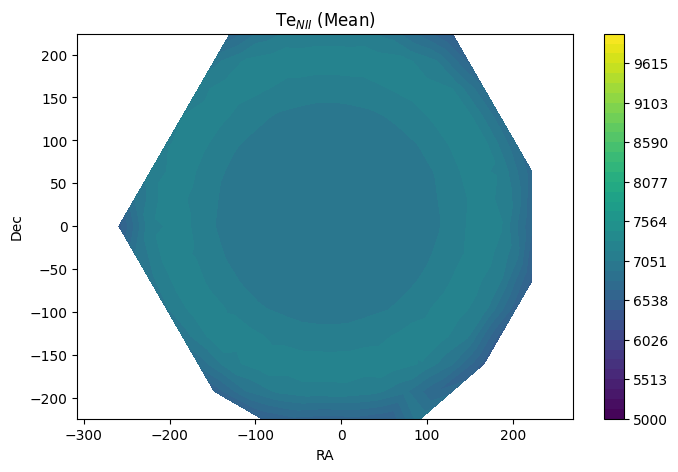

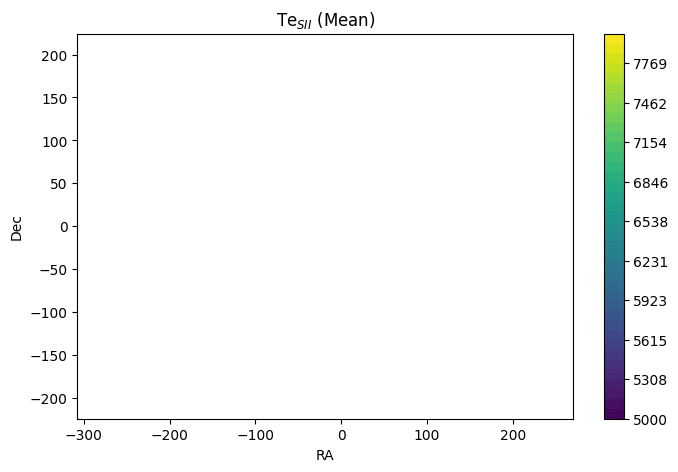

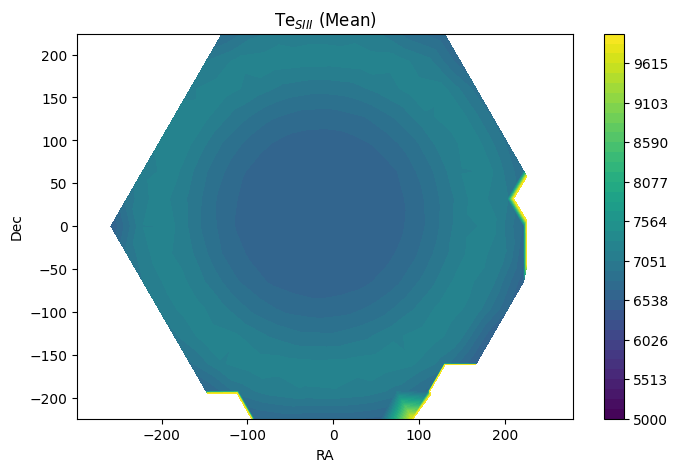

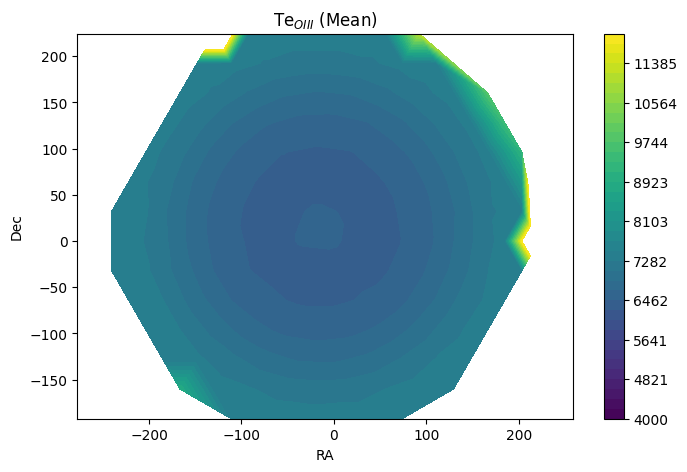

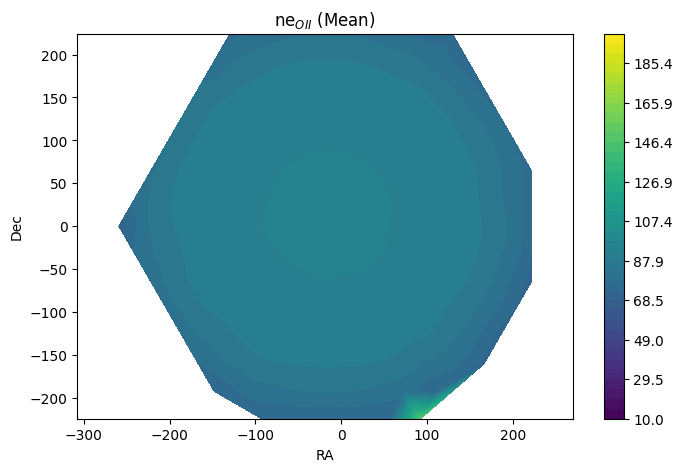

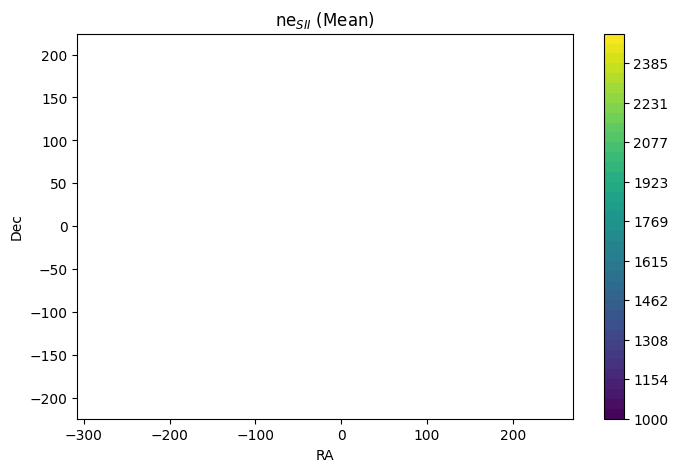

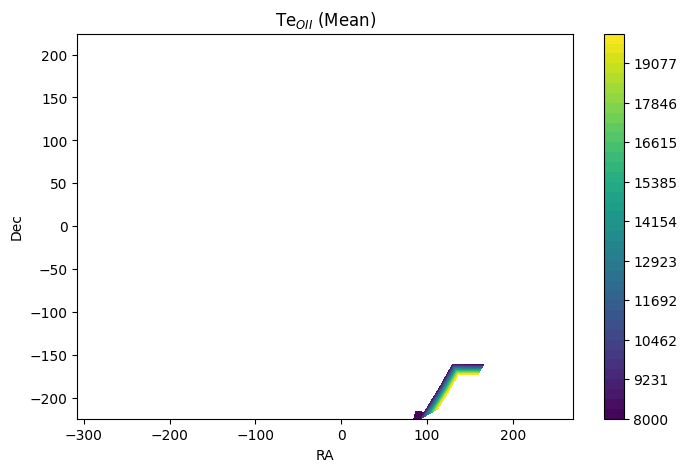

In [31]:
#Make plot profiles
u.plotmap(u.linefitdict['TeN2'], 5000 , 10000, title=r'Te$_{NII}$ (Mean)', output='TeN2', vorbin=False)
u.plotmap(u.linefitdict['TeS2'], 5000 , 8000, title=r'Te$_{SII}$ (Mean)', output='TeS2',  vorbin=False)
u.plotmap(u.linefitdict['TeS3'], 5000 , 10000, title=r'Te$_{SIII}$ (Mean)', output='TeS3',vorbin=False)
u.plotmap(u.linefitdict['TeO3'], 4000 , 12000, title=r'Te$_{OIII}$ (Mean)', output='TeO3',vorbin=False)
u.plotmap(u.linefitdict['neO2'], 10 , 200, title=r'ne$_{OII}$ (Mean)', output='neO2',     vorbin=False)
u.plotmap(u.linefitdict['neS2'], 1000 , 2500, title=r'ne$_{SII}$ (Mean)', output='neS2',  vorbin=False)
u.plotmap(u.linefitdict['TeO2'], 8000 , 20000, title=r'Te$_{OII}$ (Mean)', output='TeO2', vorbin=False)

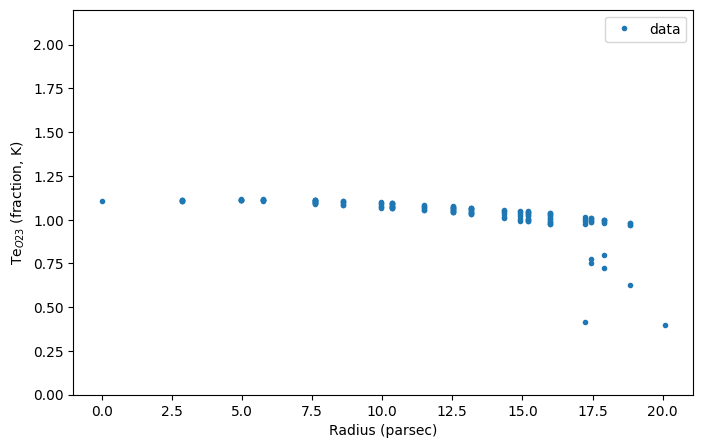

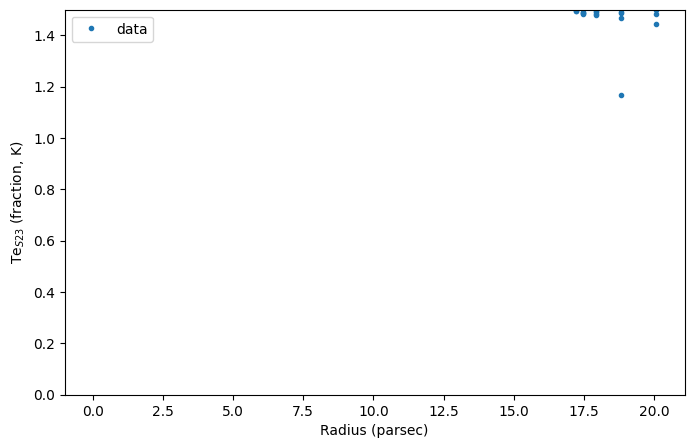

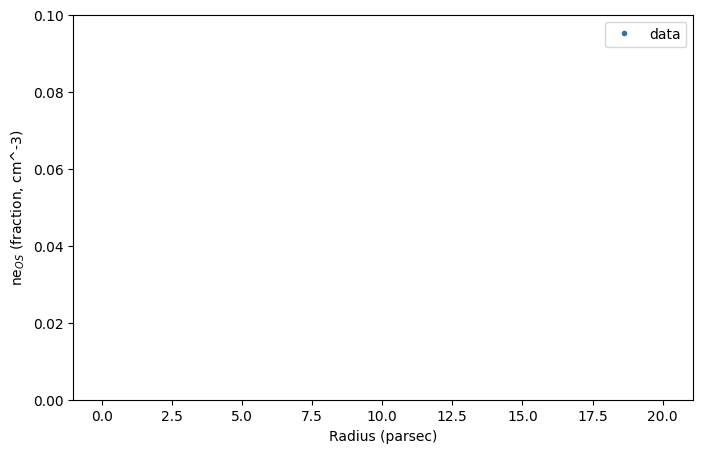

In [32]:
u.plotprofile(np.divide(u.linefitdict['TeO2'], u.linefitdict['TeO3']), 0, 2.2, title=r'Te$_{O23}$ (fraction, K)', output='TeO23 frac',    vorbin=False)
u.plotprofile(np.divide(u.linefitdict['TeS2'], u.linefitdict['TeS3']), 0, 1.5, title=r'Te$_{S23}$ (fraction, K)', output='TeS23 frac',    vorbin=False)
u.plotprofile(np.divide(u.linefitdict['neO2'], u.linefitdict['neS2']), 0, 0.1, title=r'ne$_{OS}$ (fraction, cm^-3)', output='TeOS2 frac', vorbin=False)

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(u.linefitdict['neO2'], u.linefitdict['TeO2'])
plt.xlabel('ne_O2 cm$^{-3}$')
plt.ylabel('Te O2 (K)')
plt.ylim(7000, 10000)
plt.xlim(50, 150)
title='Te vs ne for OII.png'
plt.savefig(u.simname+'/'+u.simname+'_plotprofile/'+title, dpi=300)